In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mooc-final/model1.model
/kaggle/input/mooc-final/test/test.csv
/kaggle/input/mooc-final/train/train.csv


In [2]:
from cycler import cycler


raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

raw_dark_palette = [
    (10, 132, 255), # Blue
    (255, 159, 10), # Orange
    (48, 209, 88),  # Green
    (255, 69, 58),  # Red
    (191, 90, 242), # Purple
    (94, 92, 230),  # Indigo
    (255, 55, 95),  # Pink
    (100, 210, 255),# Teal
    (255, 214, 10)  # Yellow
]

raw_gray_light_palette = [
    (142, 142, 147),# Gray
    (174, 174, 178),# Gray (2)
    (199, 199, 204),# Gray (3)
    (209, 209, 214),# Gray (4)
    (229, 229, 234),# Gray (5)
    (242, 242, 247),# Gray (6)
]

raw_gray_dark_palette = [
    (142, 142, 147),# Gray
    (99, 99, 102),  # Gray (2)
    (72, 72, 74),   # Gray (3)
    (58, 58, 60),   # Gray (4)
    (44, 44, 46),   # Gray (5)
    (28, 28, 39),   # Gray (6)
]


light_palette = np.array(raw_light_palette)/255
dark_palette = np.array(raw_dark_palette)/255
gray_light_palette = np.array(raw_gray_light_palette)/255
gray_dark_palette = np.array(raw_gray_dark_palette)/255

mpl.rcParams['axes.prop_cycle'] = cycler('color',dark_palette)
mpl.rcParams['figure.facecolor']  = gray_dark_palette[-2]
mpl.rcParams['figure.edgecolor']  = gray_dark_palette[-2]
mpl.rcParams['axes.facecolor'] =  gray_dark_palette[-2]

white_color = gray_light_palette[-2]
mpl.rcParams['text.color'] = white_color
mpl.rcParams['axes.labelcolor'] = white_color
mpl.rcParams['axes.edgecolor'] = white_color
mpl.rcParams['xtick.color'] = white_color
mpl.rcParams['ytick.color'] = white_color

mpl.rcParams['figure.dpi'] = 200

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False


## EDA


In [3]:
df = pd.read_csv('../input/mooc-final/train/train.csv') # load specific columns from train.csv
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165540 entries, 0 to 29165539
Data columns (total 9 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   enroll_id   int64 
 2   username    int64 
 3   course_id   object
 4   session_id  object
 5   action      object
 6   object      object
 7   time        object
 8   truth       int64 
dtypes: int64(4), object(5)
memory usage: 2.0+ GB


the data  contains 29165540 entries 
and have 8 columns 

In [4]:
df["action"].value_counts()

stop_video                 5561410
pause_video                4204205
click_courseware           3978918
play_video                 3415575
problem_get                2353346
load_video                 2123372
close_courseware           2019214
seek_video                 1797010
problem_check               857797
click_info                  731306
problem_check_correct       656094
click_about                 505156
problem_check_incorrect     352742
click_progress              198285
click_forum                 187465
problem_save                168675
create_comment               34015
reset_problem                13314
create_thread                 6437
delete_comment                 871
delete_thread                  329
close_forum                      4
Name: action, dtype: int64

In [5]:
df.isnull().sum()

Unnamed: 0          0
enroll_id           0
username            0
course_id           0
session_id          0
action              0
object        7695279
time                0
truth               0
dtype: int64

In [6]:
df["object"].value_counts()

ddd62bf2c3924fd388ca22b4c56e243b    207239
3f270c8babd04c3ca3c5711a8040166f    132618
0d5b3962d09b490fac9daee6aedbda82    110601
9411a34faa4343b2be8cfe99b30b4eaf     92591
98209e8f260d4629821fb8e3885ac3bf     92279
                                     ...  
55ae1468f605ab6114001f61                 1
55af34a4f605ab240c001ef2                 1
55b210fbf605abeca2000082                 1
5597bc66f605ab240c001620                 1
56d699c1f605ab6ce8000c9c                 1
Name: object, Length: 56908, dtype: int64

the action clomun can be used without the object especially that it contains a lot of missing values 

In [7]:
df=df.sample(frac=0.20, random_state=1)

In [8]:
df = pd.get_dummies(df, columns = ['action'])
df

,Unnamed: 0,enroll_id,username,course_id,session_id,object,time,truth,action_click_about,action_click_courseware,...,action_pause_video,action_play_video,action_problem_check,action_problem_check_correct,action_problem_check_incorrect,action_problem_get,action_problem_save,action_reset_problem,action_seek_video,action_stop_video
12248250,12248250,204614,1571509,course-v1:TsinghuaX+80512073X_2015_2+2015_T2,e2a9ccb6bbf469d878bfa96e995f067a,NaN,2015-10-20T16:38:13,1,0,1,...,0,0,0,0,0,0,0,0,0,0
14684335,14684335,229914,505146,course-v1:TsinghuaX+10610224X+2016_T1,18f9a32365dfa46c4a200d4752b568a6,1d7a2f3294de4393bc41fecfa3c95949,2016-03-10T11:58:36,0,0,0,...,0,0,0,0,0,0,0,0,0,1
323627,323627,5926,2735667,course-v1:TsinghuaX+00690863X+__,c6ed3783e866161ee891ac5eabbfdb7c,b28e46d4edaa4991935a651e464f3ef9,2016-03-13T17:42:17,1,0,0,...,0,0,0,0,0,0,0,0,1,0
18925675,18925675,317763,2784709,course-v1:TsinghuaX+30640014X+2016_T1,086b055a18487a72b9696eb36d72ac05,c7381ed88b9b4af4a93d49d4b42e83a4,2016-03-22T21:07:56,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11618126,11618126,191581,720244,course-v1:TsinghuaX+20120143X_2015_T2+2015_T2,2ae99866521f8e79606fd69fe883f453,3f270c8babd04c3ca3c5711a8040166f,2015-10-11T07:51:42,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19939936,19939936,338521,453792,course-v1:TsinghuaX+80512073X+2016_T1,643ede2e925890b83387d2d0e41641de,0d5b3962d09b490fac9daee6aedbda82,2016-03-27T12:04:42,1,0,0,...,0,1,0,0,0,0,0,0,0,0
6477982,6477982,100937,1097765,course-v1:TsinghuaX+10610183X_2015_T2+2015_T2,ae0275c0d11d67699e82d137a600a60f,b489bf933fb34a41abe964d3aa1277cc,2015-10-03T21:57:47,0,0,0,...,0,0,0,0,0,0,0,0,0,1
25654527,25654527,426973,486806,TsinghuaX/34100325X/2015_T1,d04b1b1d360d41131e74742710f4bb79,ddd62bf2c3924fd388ca22b4c56e243b,2015-09-26T08:25:32,0,0,0,...,0,0,0,0,0,1,0,0,0,0
17571293,17571293,281500,1949204,course-v1:TsinghuaX+AP000005X+2016_T2,ea6a6a2af6f3c5108d7c197e81240bc0,36522c80a1584f84aee95d1a73cbf776,2016-07-09T17:25:15,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
df = pd.DataFrame(df.groupby(['username', 'course_id']).sum())
df

/tmp/ipykernel_20/1051714880.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = pd.DataFrame(df.groupby(['username', 'course_id']).sum())


Unnamed: 0  enroll_id  \
username course_id                                                             
5        TsinghuaX/60510102X/_                           24058575     408180   
         TsinghuaX/70240183x/2015_T2                      9520901     158466   
         TsinghuaX/80511503X/2015_T2                     76720324    1222470   
         course-v1:MicrosoftX+Microsoft101+_             66068586    1035160   
         course-v1:TsinghuaX+00720091X_2015_2+2015_T2    64660977     987152   
...                                                           ...        ...   
6986779  course-v1:TsinghuaX+20320074X+2017_T1          306184345    5047266   
7011178  course-v1:TsinghuaX+AP000008X+2017T1           160024616    2590344   
7019483  course-v1:TsinghuaX+20320074X+2017_T1          198081317    3264547   
7023562  course-v1:TsinghuaX+AP000008X+2017T1           693700146   11241009   
7036067  course-v1:TsinghuaX+AP000008X+2017T1           106439548    1723644   

                                                       truth  \
username course_id                                             
5        TsinghuaX/60510102X/_                             3   
         TsinghuaX/70240183x/2015_T2                      11   
         TsinghuaX/80511503X/2015_T2                      10   
         course-v1:MicrosoftX+Microsoft101+_               0   
         course-v1:TsinghuaX+00720091X_2015_2+2015_T2      4   
...                                                      ...   
6986779  course-v1:TsinghuaX+20320074X+2017_T1             0   
7011178  course-v1:TsinghuaX+AP000008X+2017T1              9   
7019483  course-v1:TsinghuaX+20320074X+2017_T1            11   
7023562  course-v1:TsinghuaX+AP000008X+2017T1             39   
7036067  course-v1:TsinghuaX+AP000008X+2017T1              6   

                                                       action_click_about  \
username course_id                                                          
5        TsinghuaX/60510102X/_                                          0   
         TsinghuaX/70240183x/2015_T2                                    0   
         TsinghuaX/80511503X/2015_T2                                    0   
         course-v1:MicrosoftX+Microsoft101+_                            0   
         course-v1:TsinghuaX+00720091X_2015_2+2015_T2                   0   
...                                                                   ...   
6986779  course-v1:TsinghuaX+20320074X+2017_T1                          3   
7011178  course-v1:TsinghuaX+AP000008X+2017T1                           1   
7019483  course-v1:TsinghuaX+20320074X+2017_T1                          0   
7023562  course-v1:TsinghuaX+AP000008X+2017T1                           0   
7036067  course-v1:TsinghuaX+AP000008X+2017T1                           1   

                                                       action_click_courseware  \
username course_id                                                               
5        TsinghuaX/60510102X/_                                               0   
         TsinghuaX/70240183x/2015_T2                                         0   
         TsinghuaX/80511503X/2015_T2                                         0   
         course-v1:MicrosoftX+Microsoft101+_                                 2   
         course-v1:TsinghuaX+00720091X_2015_2+2015_T2                        0   
...                                                                        ...   
6986779  course-v1:TsinghuaX+20320074X+2017_T1                               3   
7011178  course-v1:TsinghuaX+AP000008X+2017T1                                3   
7019483  course-v1:TsinghuaX+20320074X+2017_T1                               2   
7023562  course-v1:TsinghuaX+AP000008X+2017T1                                2   
7036067  course-v1:TsinghuaX+AP000008X+2017T1                                0   

                                                       action_click_forum  \
username course_id                 

In [10]:
df['truth'] = np.where(df['truth'] >= 1, 1,0)

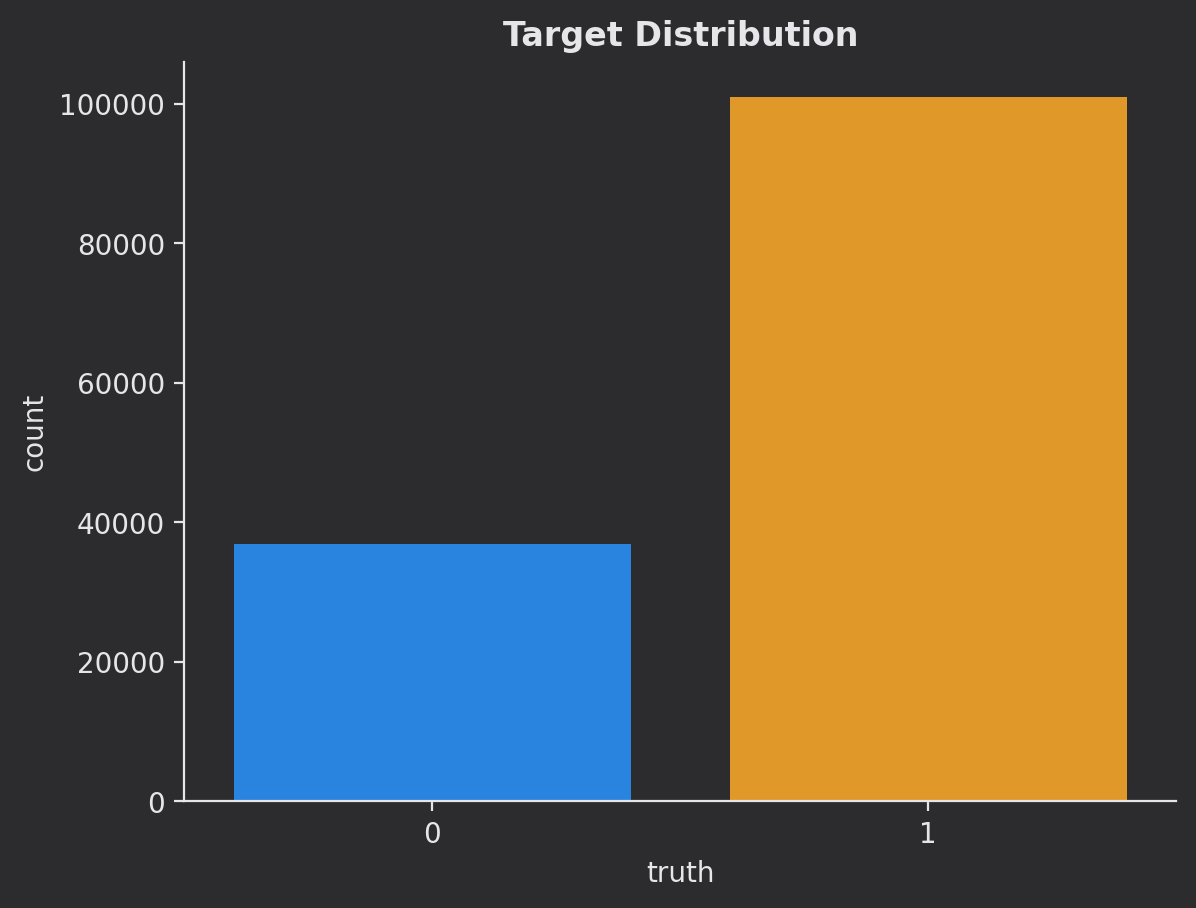

In [11]:
fig, ax = plt.subplots()
sns.countplot(x='truth', data=df, order=sorted(df['truth'].unique()), ax=ax)
ax.set_title('Target Distribution', weight='bold')
plt.show()

In [12]:
df=df.drop(['Unnamed: 0','enroll_id'],axis=1)

there is sligitly unbalanced in the day so we might consider unbalanced data methods

In [13]:
df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
truth,137720.000000,0.732595,0.442607,0.000000,0.000000,1.000000,1.000000,1.000000
action_click_about,137720.000000,0.736886,1.691311,0.000000,0.000000,0.000000,1.000000,128.000000
action_click_courseware,137720.000000,5.770687,12.600112,0.000000,0.000000,1.000000,5.000000,511.000000
action_click_forum,137720.000000,0.273010,1.462331,0.000000,0.000000,0.000000,0.000000,118.000000
action_click_info,137720.000000,1.058082,2.168905,0.000000,0.000000,0.000000,1.000000,102.000000
action_click_progress,137720.000000,0.287598,1.047416,0.000000,0.000000,0.000000,0.000000,37.000000
action_close_courseware,137720.000000,2.930961,6.001666,0.000000,0.000000,1.000000,3.000000,174.000000
action_create_comment,137720.000000,0.049259,0.455738,0.000000,0.000000,0.000000,0.000000,40.000000
action_create_thread,137720.000000,0.009026,0.117759,0.000000,0.000000,0.000000,0.000000,9.000000
action_delete_comment,137720.000000,0.001249,0.043931,0.000000,0.000000,0.000000,0.000000,8.000000


In [14]:
for column in df:
    print(column)

truth
action_click_about
action_click_courseware
action_click_forum
action_click_info
action_click_progress
action_close_courseware
action_create_comment
action_create_thread
action_delete_comment
action_delete_thread
action_load_video
action_pause_video
action_play_video
action_problem_check
action_problem_check_correct
action_problem_check_incorrect
action_problem_get
action_problem_save
action_reset_problem
action_seek_video
action_stop_video


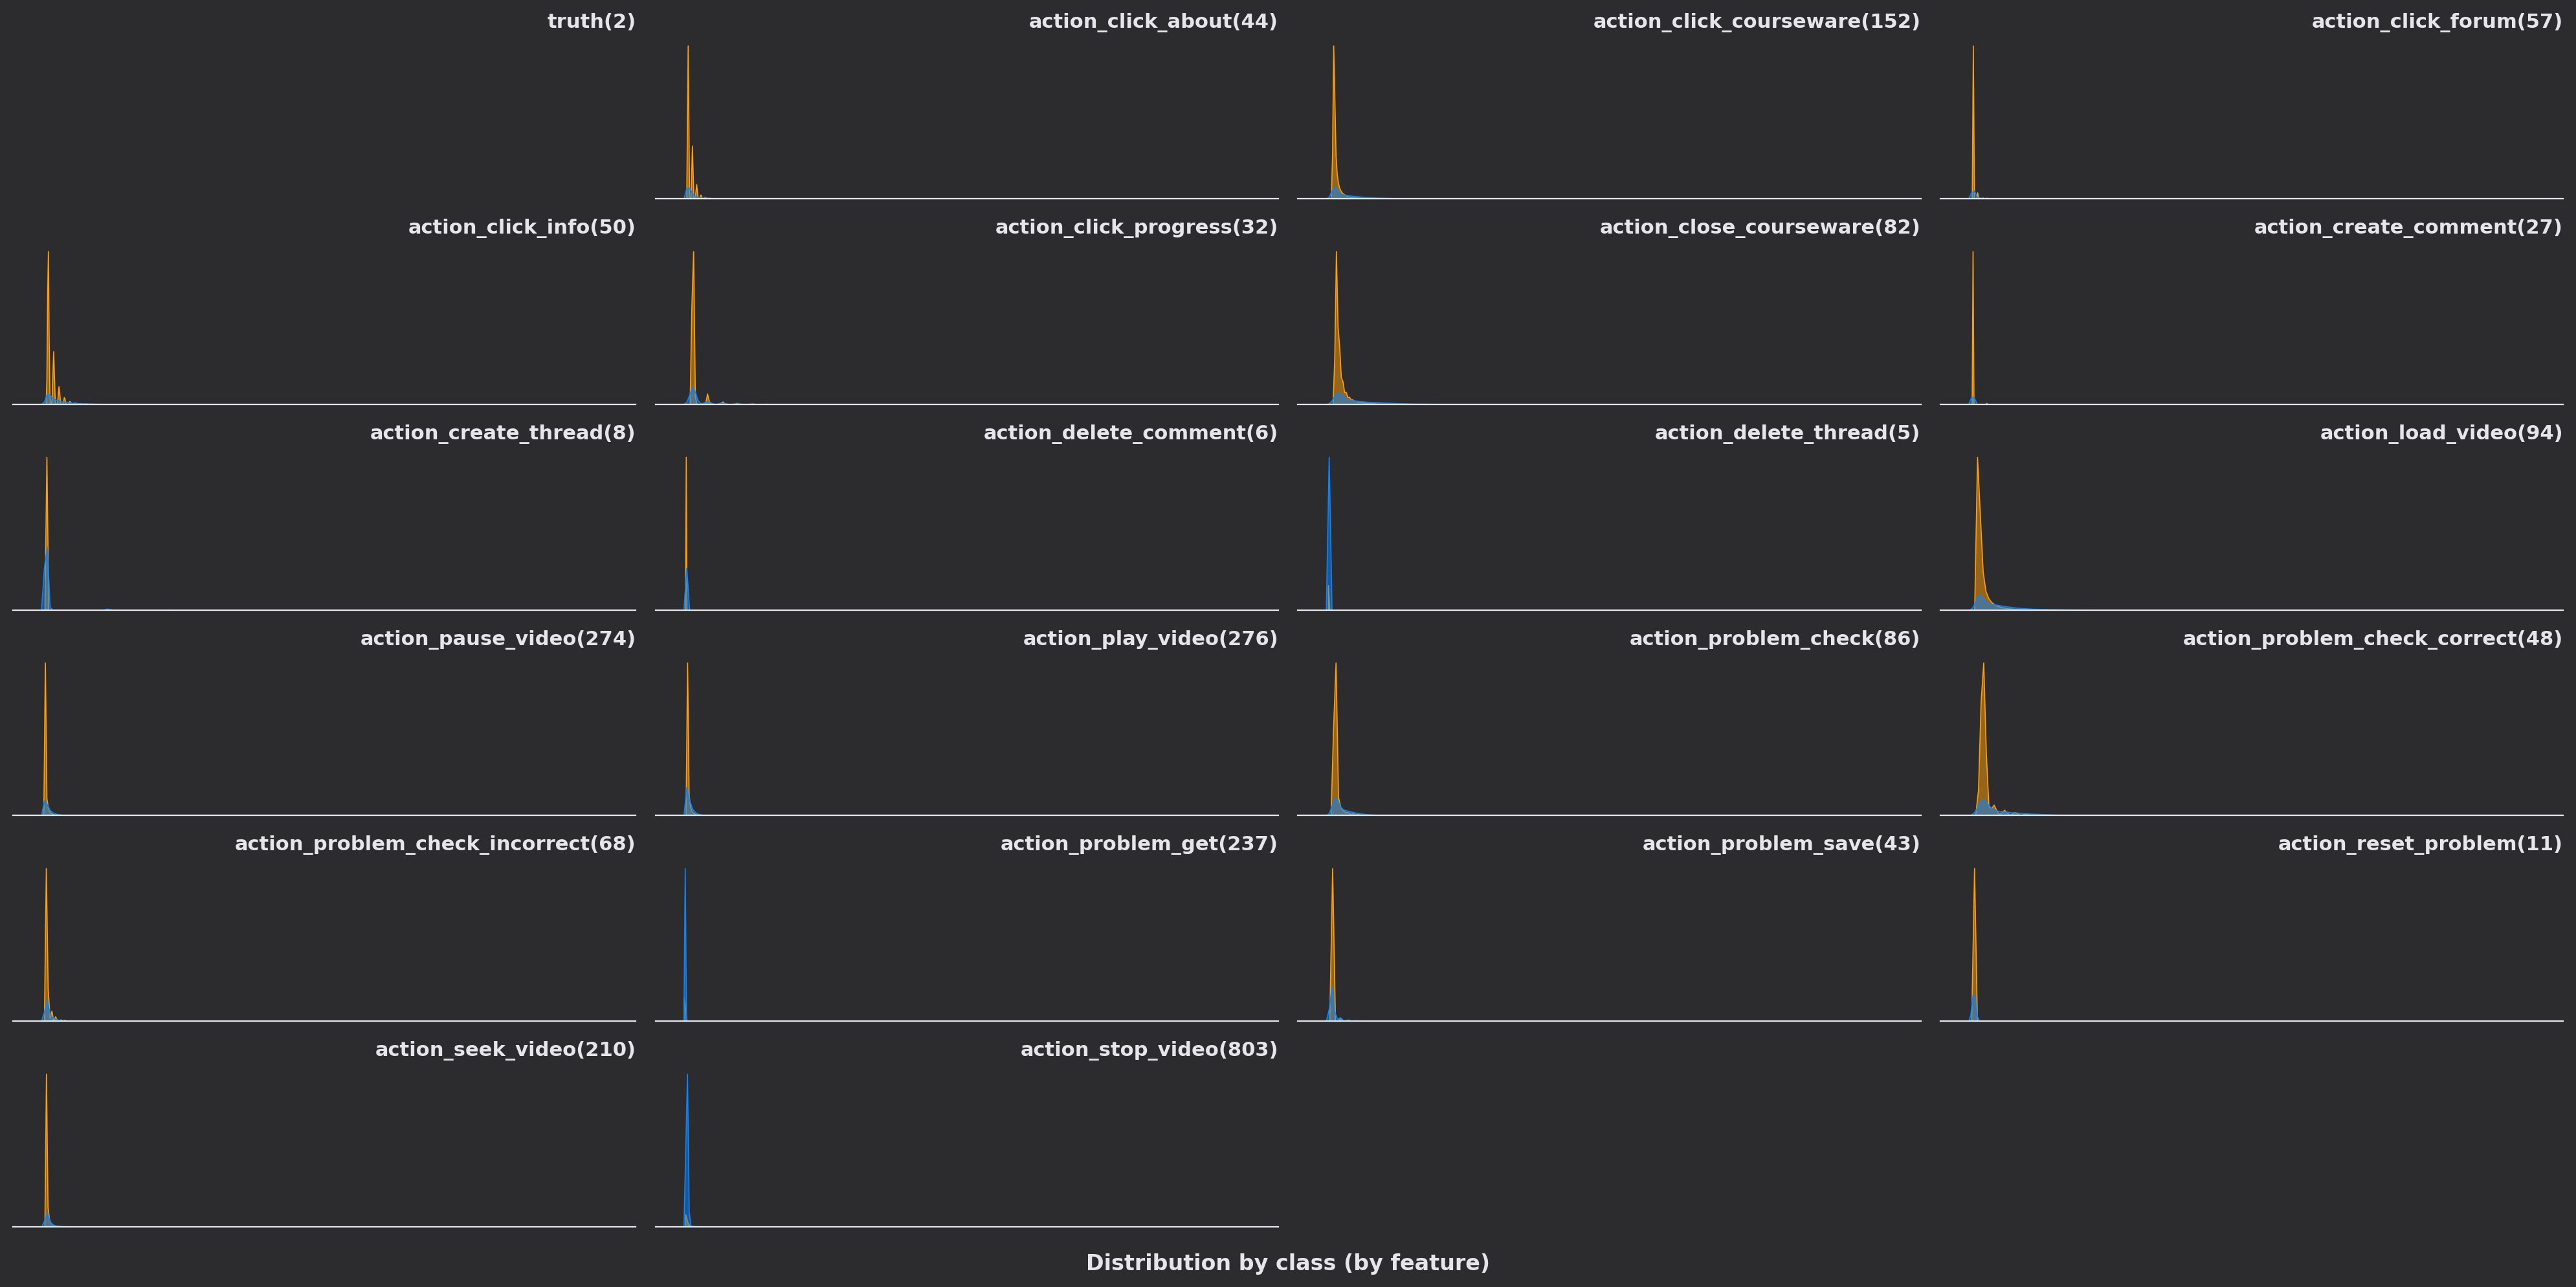

In [15]:
fig, axes = plt.subplots(6, 4, figsize=(20, 10))

target_order = sorted(df['truth'].unique())
for column ,ax in zip(df,axes.flatten()):
    cnt = df[column].value_counts().sort_index()
    sns.kdeplot(x=column, 
                hue='truth', hue_order=target_order,
                data=df,
                alpha=0.5, 
                linewidth=0.6, fill=True,
                legend=False,
                ax=ax,warn_singular=False)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(False)
    cnt = len(df[column].unique())
    ax.set_title(f'{column}({cnt})', loc='right', weight='bold', fontsize=11)
    
axes.flatten()[0].axis('off') 
axes.flatten()[-1].axis('off')    
axes.flatten()[-2].axis('off') 
fig.supxlabel('Distribution by class (by feature)', ha='center', fontweight='bold')

fig.tight_layout()
plt.show()

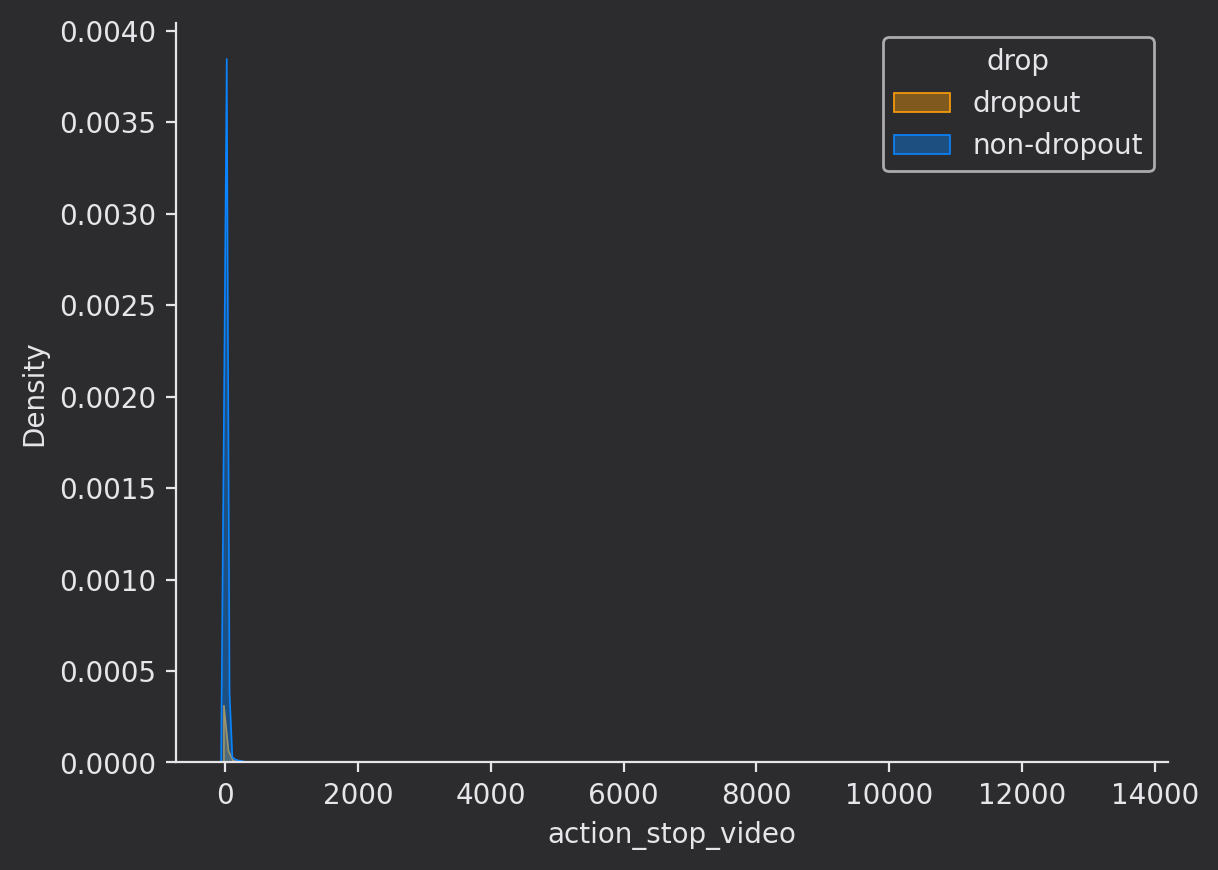

In [16]:
g=sns.kdeplot(x='action_stop_video', 
                hue='truth', hue_order=target_order,
                data=df,
                alpha=0.4, 
                linewidth=0.6, fill=True,
                legend=False,
                warn_singular=False)

plt.legend(title='drop', loc='upper right', labels=['dropout','non-dropout'])
plt.show(g)

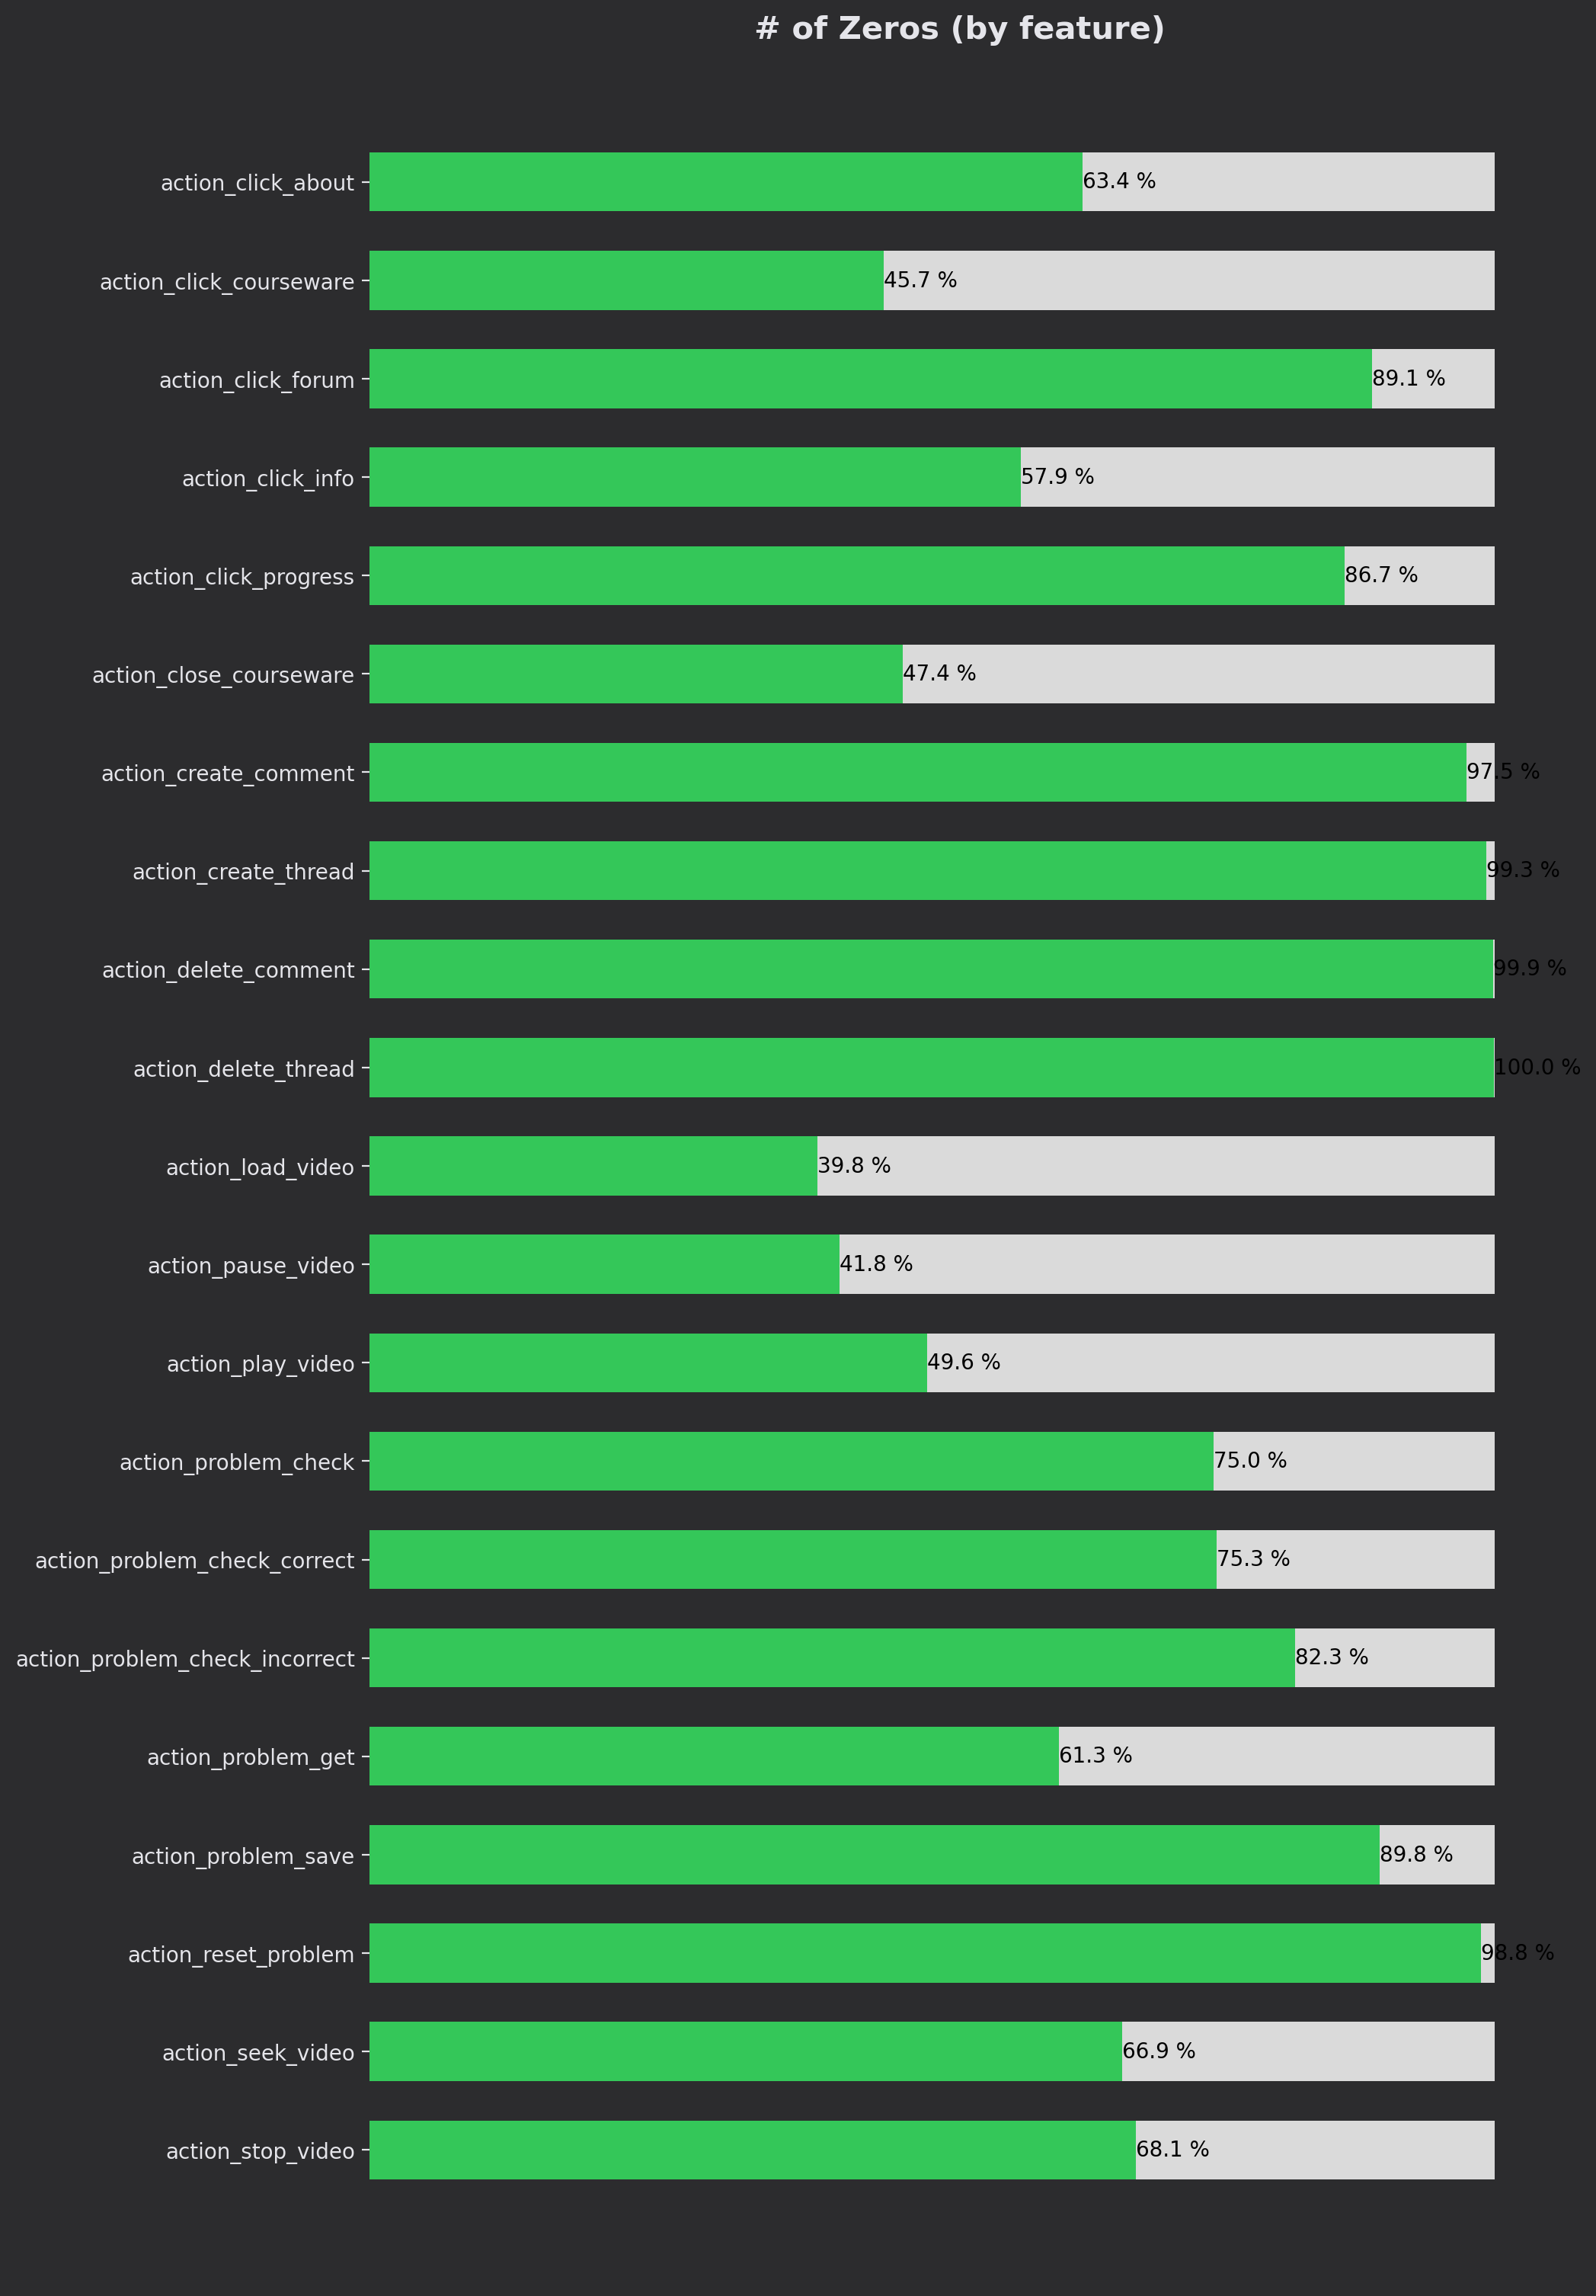

In [17]:
zero_data = ((df.iloc[:,1:]==0).sum() / len(df) * 100)[::-1]
fig, ax = plt.subplots(1,1,figsize=(10, 19))

ax.barh(zero_data.index, 100, color='#dadada', height=0.6)
barh = ax.barh(zero_data.index, zero_data, color=light_palette[2], height=0.6)
ax.bar_label(barh, fmt='%.01f %%', color='black')
ax.spines[['left', 'bottom']].set_visible(False)

ax.set_xticks([])

ax.set_title('# of Zeros (by feature)', loc='center', fontweight='bold', fontsize=15)    
plt.show()

In [18]:
target_order = sorted(df['truth'].unique())
mean = df.groupby('truth').mean().sort_index()
std = df.groupby('truth').std().sort_index()
mean['action_click_about']

truth
0    1.223803
1    0.559157
Name: action_click_about, dtype: float64

In [19]:
mean

,action_click_about,action_click_courseware,action_click_forum,action_click_info,action_click_progress,action_close_courseware,action_create_comment,action_create_thread,action_delete_comment,action_delete_thread,...,action_pause_video,action_play_video,action_problem_check,action_problem_check_correct,action_problem_check_incorrect,action_problem_get,action_problem_save,action_reset_problem,action_seek_video,action_stop_video
truth,,,,,,,,,,,,,,,,,,,,,
0,1.223803,14.003204,0.716648,2.182285,0.693024,6.906998,0.146197,0.025416,0.003666,0.001303,...,13.932984,11.330355,2.790208,2.157846,1.021126,7.743422,0.535395,0.039781,5.617672,19.882097
1,0.559157,2.765732,0.111078,0.647736,0.139613,1.479667,0.013876,0.003043,0.000367,0.000129,...,3.240136,2.631322,0.684210,0.518619,0.327139,1.837699,0.141377,0.012132,1.509887,3.778607


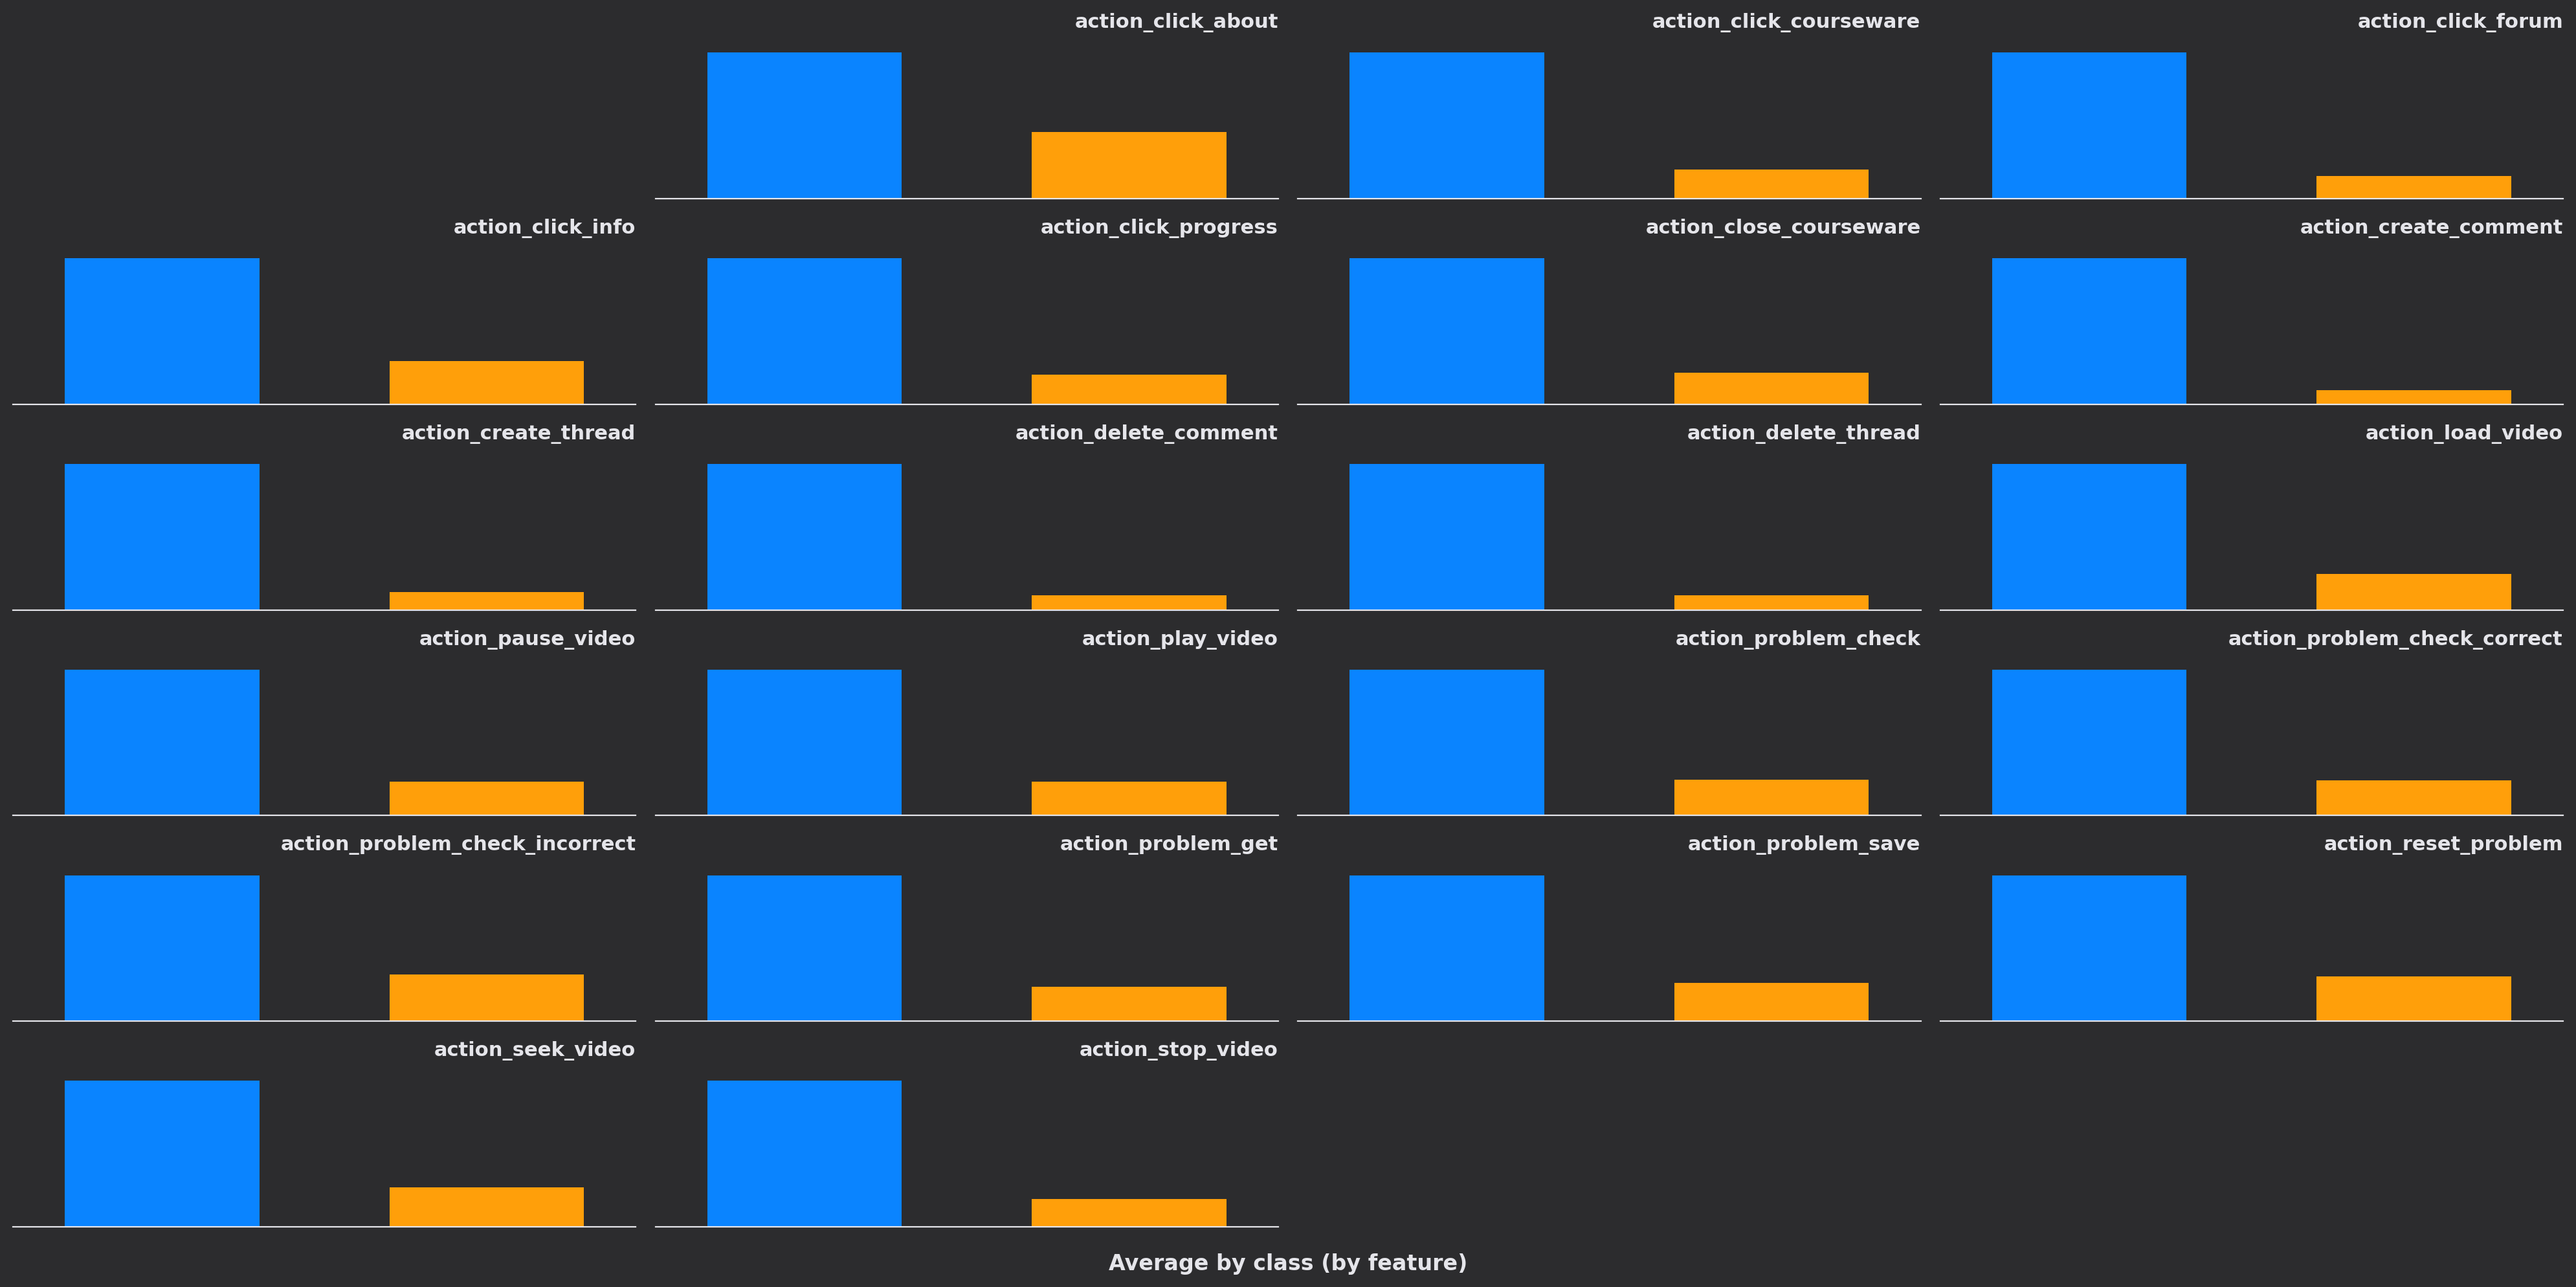

In [20]:
fig, axes = plt.subplots(6, 4, figsize=(20, 10))

target_order = sorted(df['truth'].unique())
mean = df.groupby('truth').mean().sort_index()
std = df.groupby('truth').std().sort_index()

for column ,ax in zip(df,axes.flatten()):
    if column=='truth':
        continue
    ax.bar(mean[column].index, mean[column], 
           color=dark_palette[:4], width=0.6)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.margins(0.1)
    ax.spines['left'].set_visible(False)
    ax.set_title(f'{column}', loc='right', weight='bold', fontsize=11)
axes.flatten()[0].axis('off')  
axes.flatten()[-1].axis('off')
axes.flatten()[-2].axis('off')

fig.supxlabel('Average by class (by feature)', ha='center', fontweight='bold')
fig.tight_layout()
plt.show()

In [21]:
label_dict = {val:idx for idx, val in enumerate(sorted(df['truth'].unique()))}
df['truth'] = df['truth'].map(label_dict)

/tmp/ipykernel_20/3231983630.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


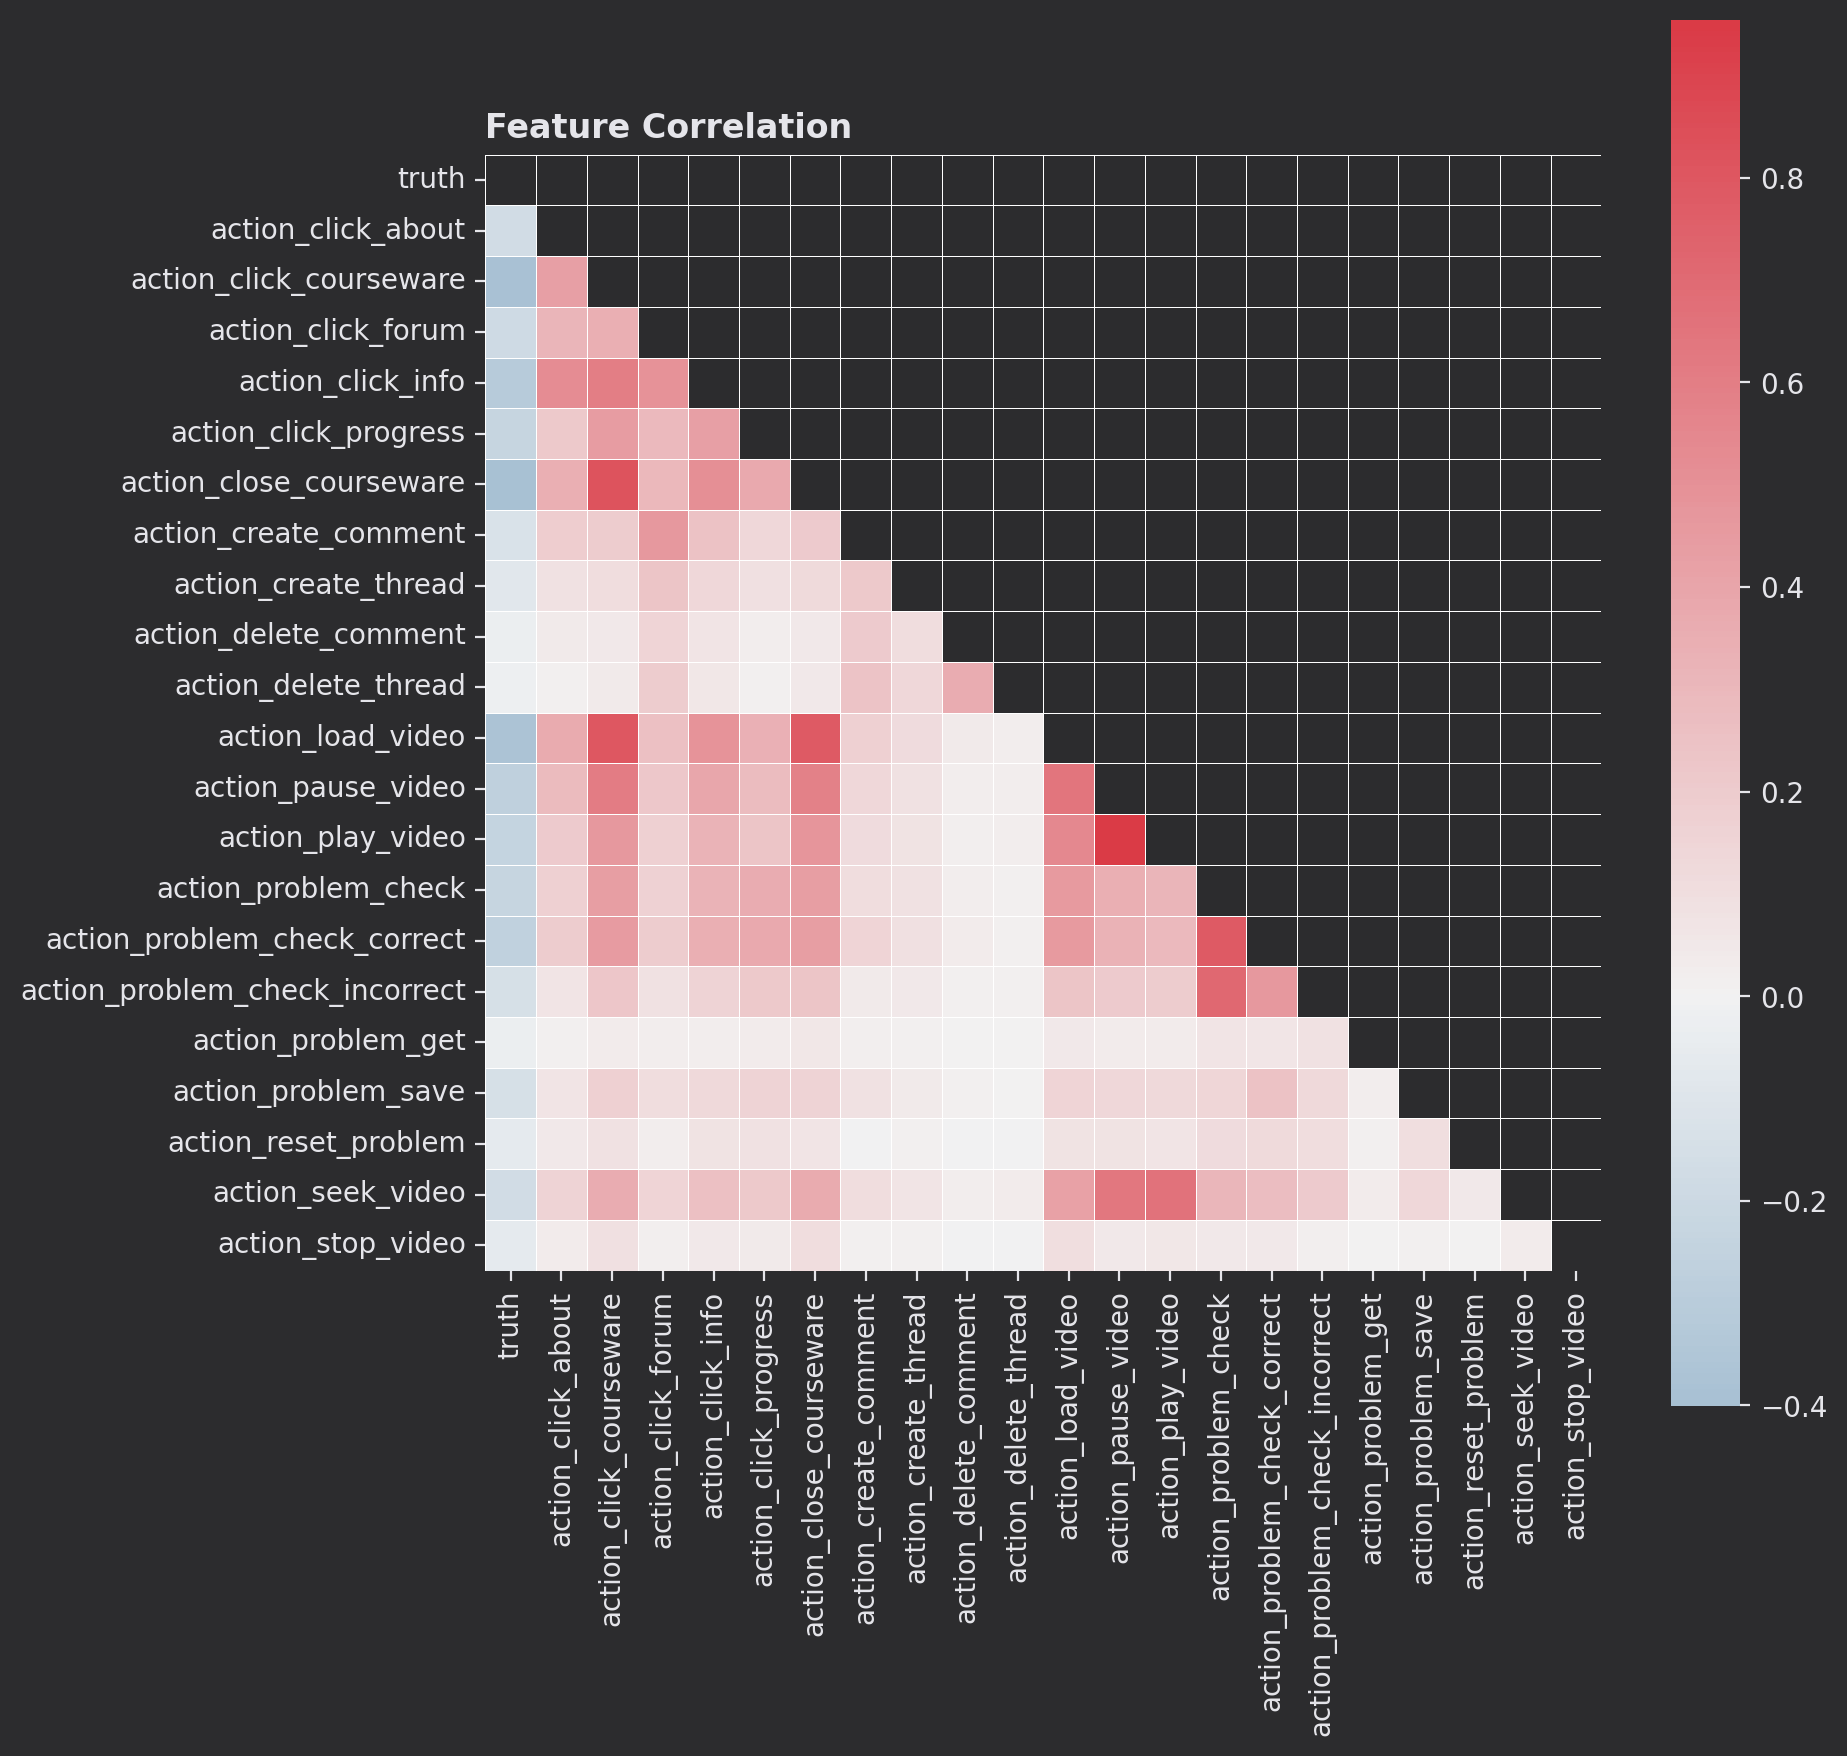

In [22]:
fig, ax = plt.subplots(figsize=(9 , 9))

corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True



sns.heatmap(corr,
        square=True, center=0, linewidth=0.2,
        cmap=sns.diverging_palette(240, 10, as_cmap=True),
        mask=mask, ax=ax) 

ax.set_title('Feature Correlation', loc='left', fontweight='bold')
plt.show()

In [23]:
from umap import UMAP

train_sub = df.sample(40000, random_state=0)
target = train_sub['truth']
umap = UMAP(random_state=0)
dr = umap.fit_transform(train_sub.iloc[:,:-1], target)

/opt/conda/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/conda/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/conda/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argume

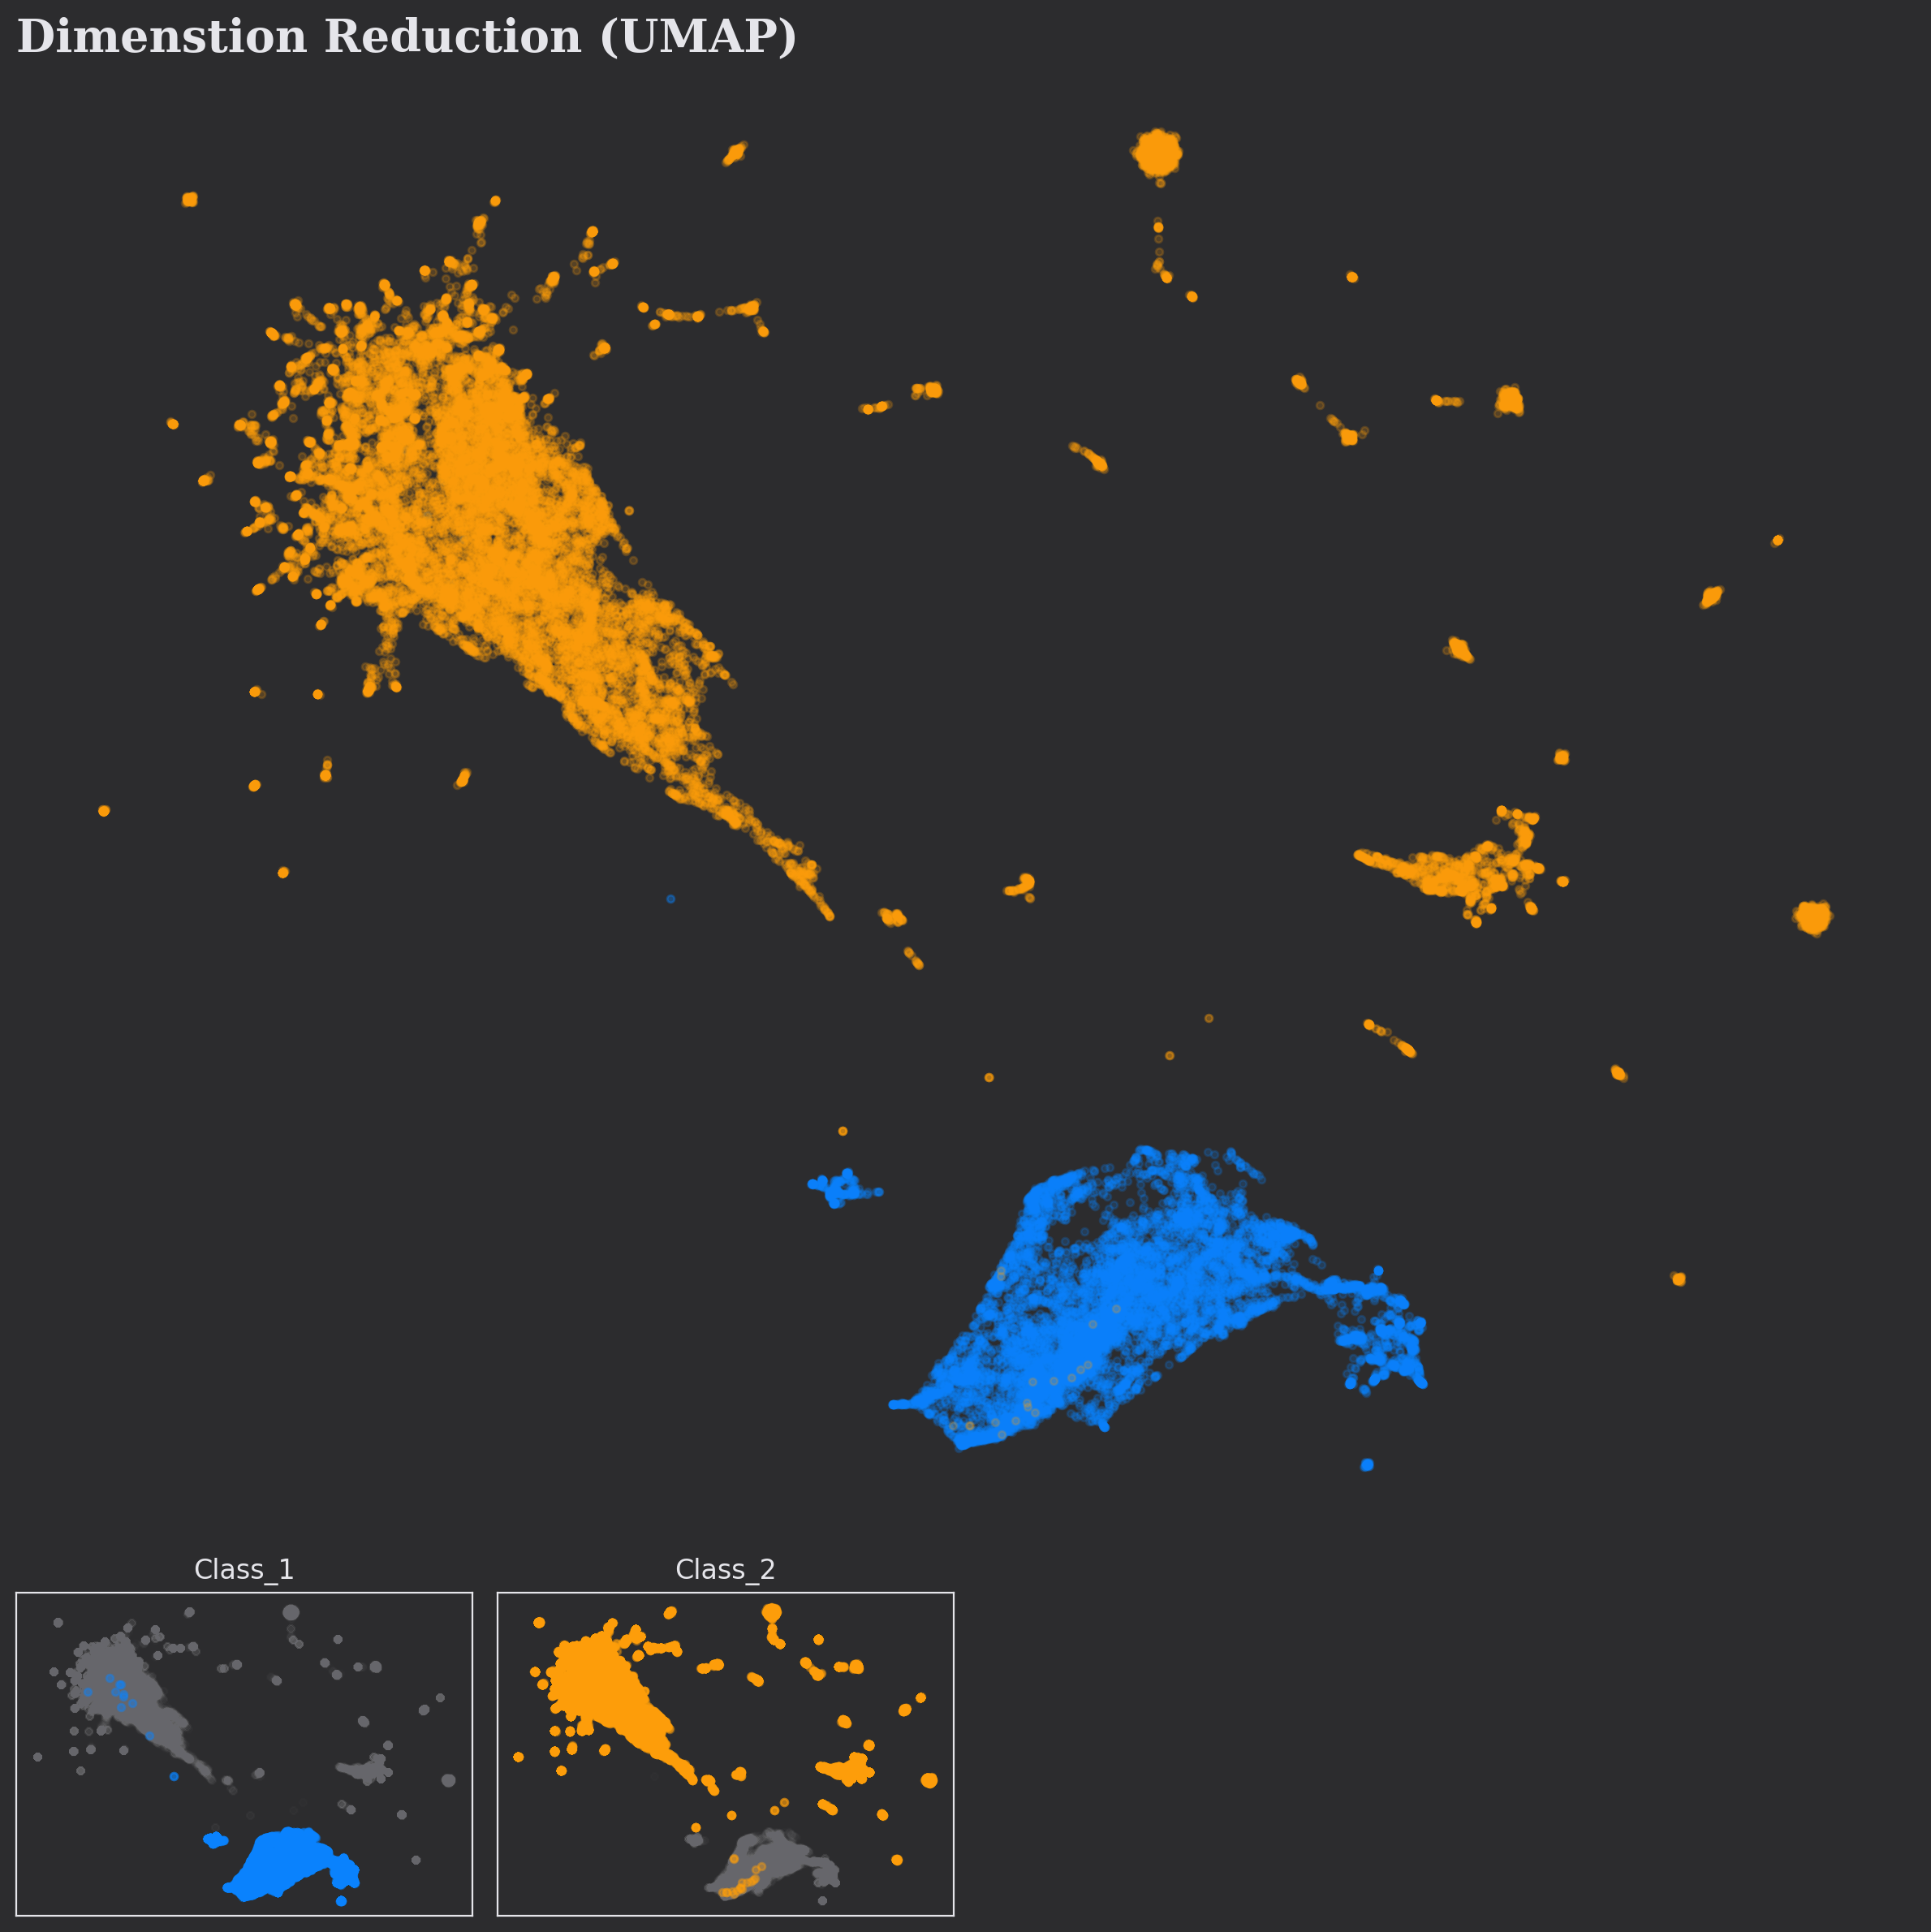

In [24]:
fig = plt.figure(figsize=(12, 12))
gs = fig.add_gridspec(5, 4)
ax = fig.add_subplot(gs[:-1,:])

sub_axes = [None] * 2
for idx in range(2): 
    sub_axes[idx] = fig.add_subplot(gs[-1,idx])

for idx in range(2):
    ax.scatter(x=dr[:,0][target==idx], y=dr[:,1][target==idx],
              s=10, alpha=0.2
              )

    for j in range(2):
        sub_axes[j].scatter(x=dr[:,0][target==idx], y=dr[:,1][target==idx],
                              s=10, alpha = 0.4 if idx==j else 0.008, color = (dark_palette[j%9]) if idx==j else white_color,
                            zorder=(idx==j)
                           )
        
    
    sub_axes[idx].set_xticks([])
    sub_axes[idx].set_yticks([])
    sub_axes[idx].set_xlabel('')
    sub_axes[idx].set_ylabel('')
    sub_axes[idx].set_title(f'Class_{idx+1}')
    sub_axes[idx].spines['right'].set_visible(True)
    sub_axes[idx].spines['top'].set_visible(True)
    
ax.set_title('Dimenstion Reduction (UMAP)', fontweight='bold', fontfamily='serif', fontsize=20, loc='left')  
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

fig.tight_layout()
plt.show()

In [25]:
for col in df:
    print(col)

truth
action_click_about
action_click_courseware
action_click_forum
action_click_info
action_click_progress
action_close_courseware
action_create_comment
action_create_thread
action_delete_comment
action_delete_thread
action_load_video
action_pause_video
action_play_video
action_problem_check
action_problem_check_correct
action_problem_check_incorrect
action_problem_get
action_problem_save
action_reset_problem
action_seek_video
action_stop_video


In [26]:
df_binary=df.copy()
df_binary['action_click_about'] = np.where(df['action_click_about'] >= 1, 1,0)
df_binary['action_click_courseware'] = np.where(df['action_click_courseware'] >= 1, 1,0)
df_binary['action_click_forum'] = np.where(df['action_click_forum'] >= 1, 1,0)
df_binary['action_click_info'] = np.where(df['action_click_info'] >= 1, 1,0)
df_binary['action_click_progress'] = np.where(df['action_click_progress'] >= 1, 1,0)
df_binary['action_close_courseware'] = np.where(df['action_close_courseware'] >= 1, 1,0)
df_binary['action_delete_comment'] = np.where(df['action_delete_comment'] >= 1, 1,0)
df_binary['action_load_video'] = np.where(df['action_load_video'] >= 1, 1,0)
df_binary['action_pause_video'] = np.where(df['action_pause_video'] >= 1, 1,0)
df_binary['action_play_video'] = np.where(df['action_play_video'] >= 1, 1,0)
df_binary['action_problem_check_correct'] = np.where(df['action_problem_check_correct'] >= 1, 1,0)
df_binary['action_problem_get'] = np.where(df['action_problem_get'] >= 1, 1,0)
df_binary['action_problem_save'] = np.where(df['action_problem_save'] >= 1, 1,0)
df_binary['action_seek_video'] = np.where(df['action_seek_video'] >= 1, 1,0)
df_binary['action_stop_video'] = np.where(df['action_stop_video'] >= 1, 1,0)
df_binary['action_problem_check'] = np.where(df['action_problem_check'] >= 1, 1,0)
df_binary['action_create_comment'] = np.where(df['action_create_comment'] >= 1, 1,0)
df_binary['action_create_thread'] = np.where(df['action_create_thread'] >= 1, 1,0)
df_binary['action_delete_thread'] = np.where(df['action_delete_thread'] >= 1, 1,0)
df_binary['action_problem_check_incorrect'] = np.where(df['action_delete_thread'] >= 1, 1,0)
df_binary['action_reset_problem'] = np.where(df['action_reset_problem'] >= 1, 1,0)

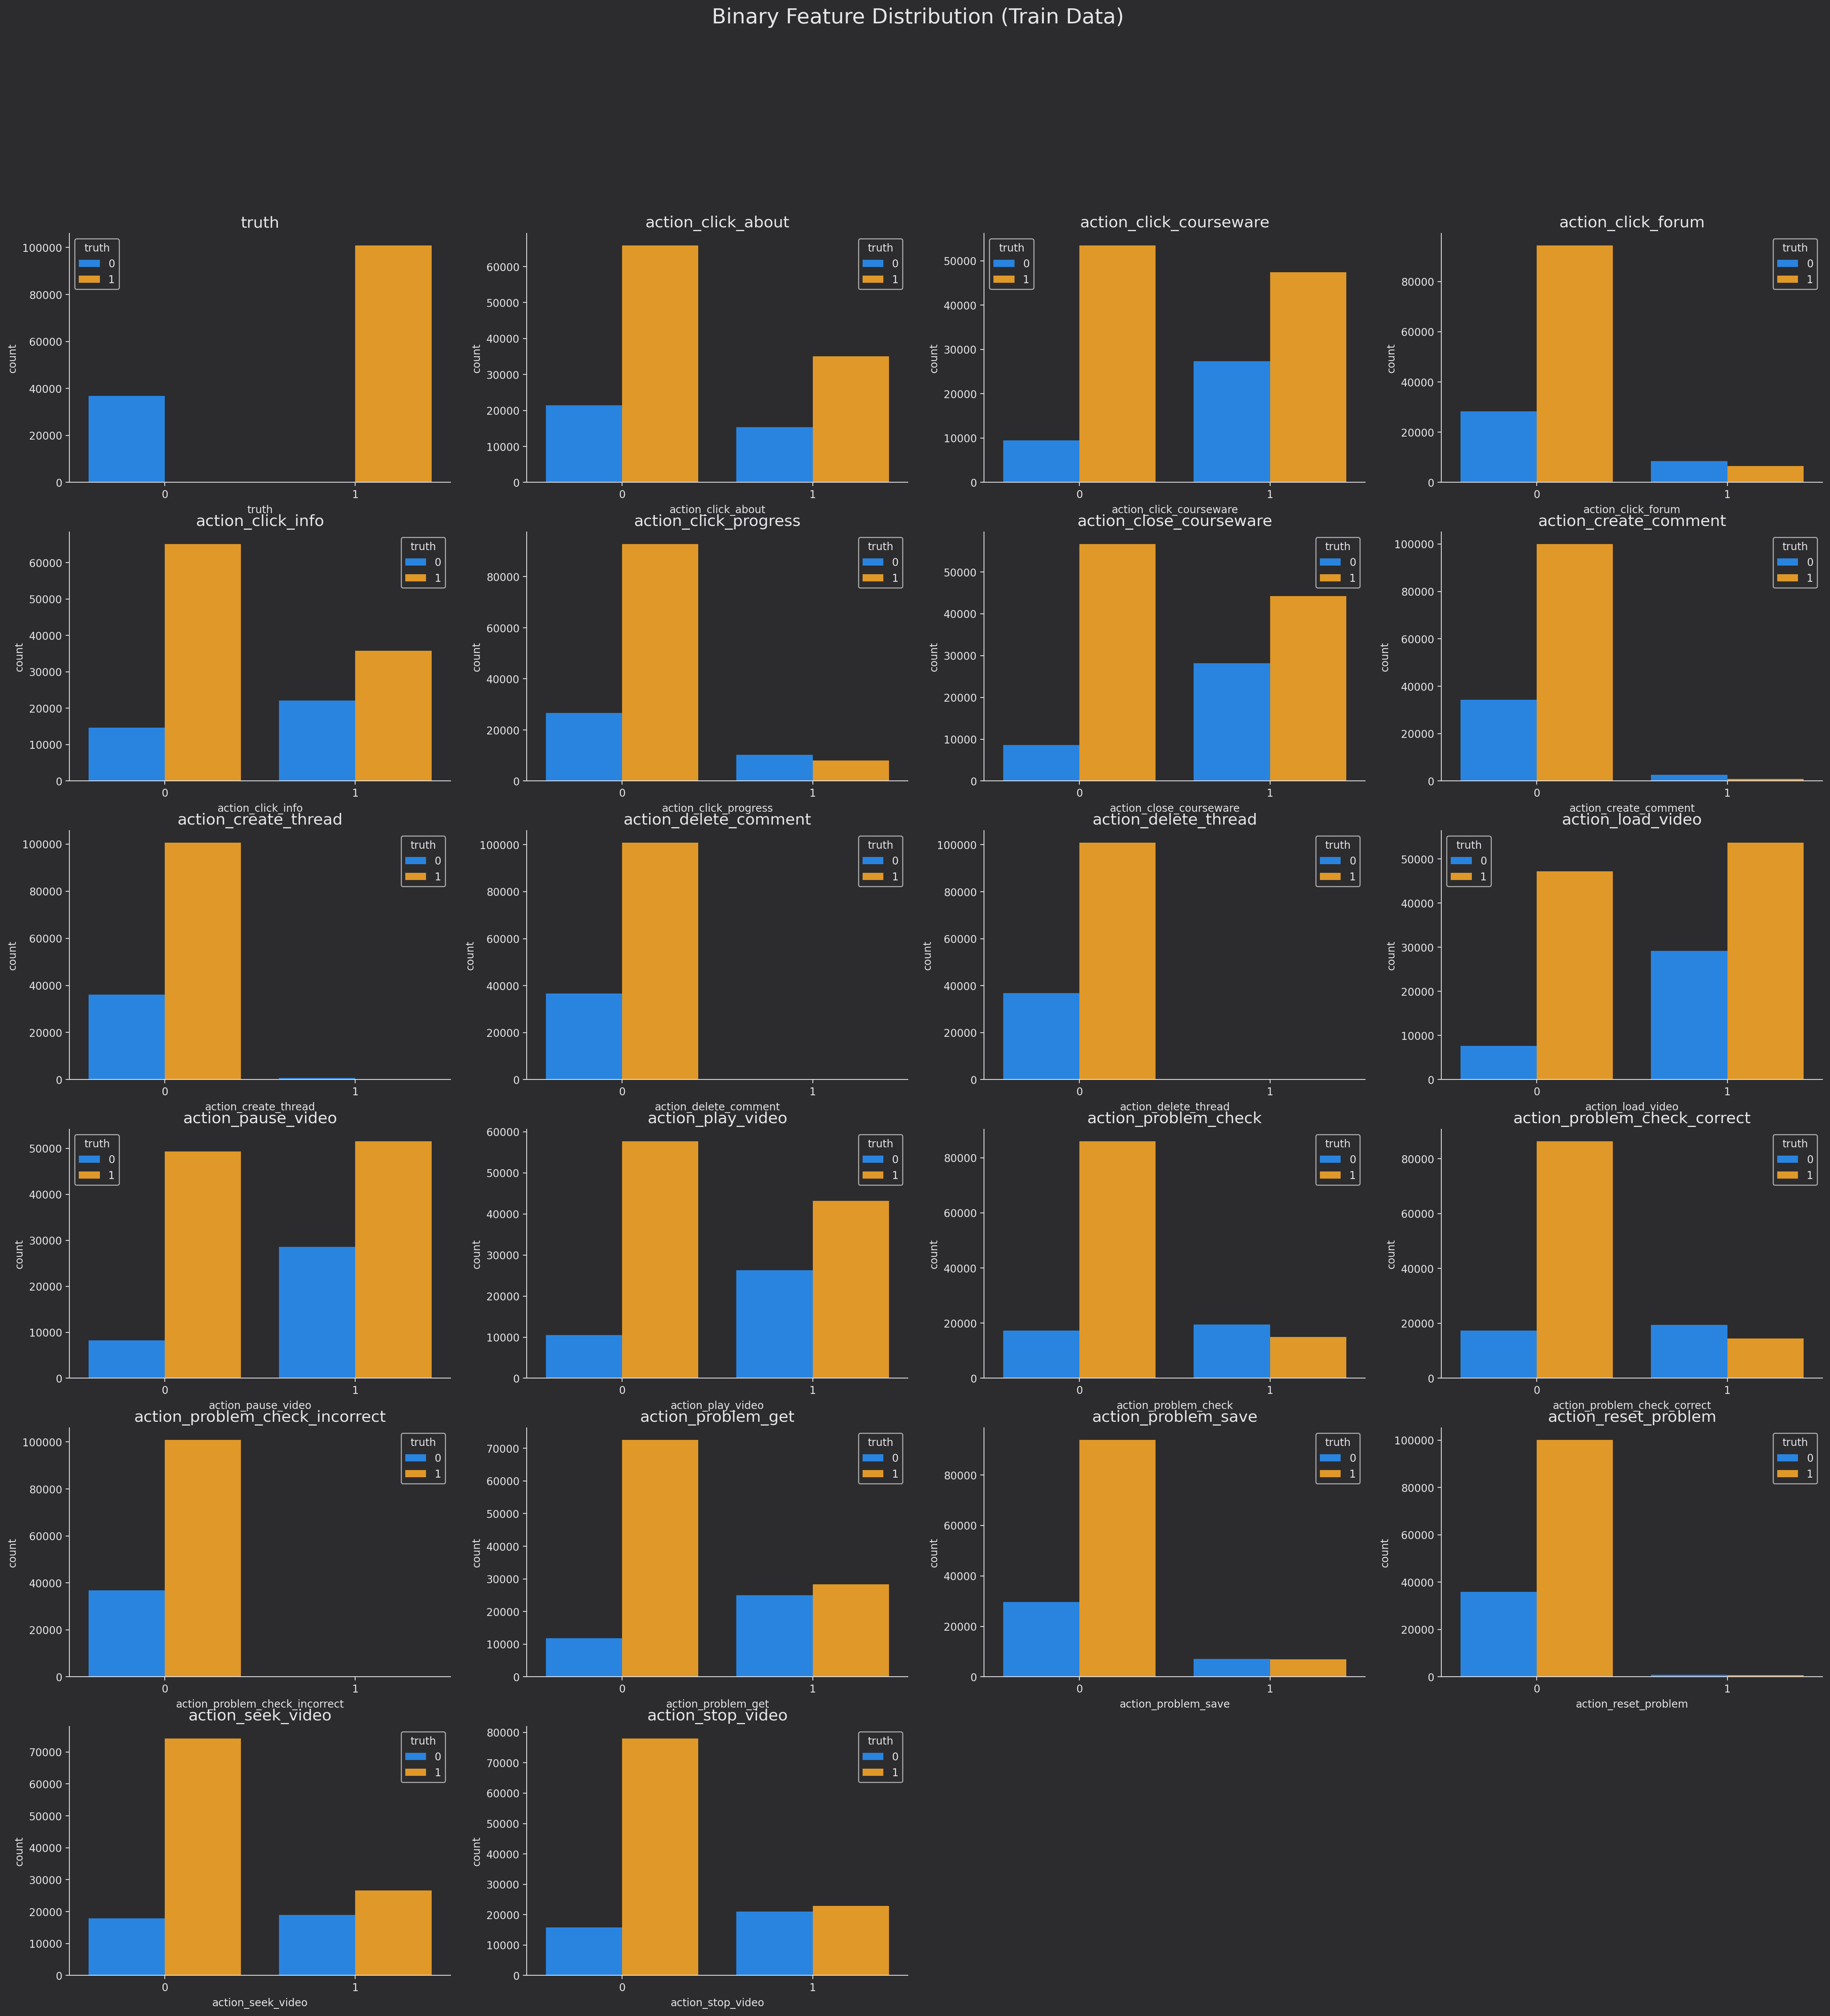

In [27]:
fig, axes = plt.subplots(6,4, figsize=(30, 30))
for column ,ax in zip(df_binary,axes.flatten()): 
    sns.countplot(x=column, hue='truth', data=df_binary,ax=ax)
    ax.set_title(f'{column}', fontsize=15)
axes.flatten()[-1].axis('off')
axes.flatten()[-2].axis('off')
fig.suptitle("Binary Feature Distribution (Train Data)", fontsize=20)
plt.show()

## auto Ml


In [28]:
!pip install pycaret
from pycaret.classification import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 9.0 MB

In [29]:
import gc
fields1 = ['username', 'course_id', 'action', 'truth'] # specific columns to load into the dataframe
fields2 = ['username', 'course_id', 'time']
gc.enable()

In [30]:
del df 
gc.collect()

0

In [31]:
data_train_action = pd.read_csv('../input/mooc-final/train/train.csv', usecols = fields1) # load specific columns from train.csv
data_train_time = pd.read_csv('../input/mooc-final/train/train.csv', usecols = fields2) # load specific columns from train.csv
data_test_action = pd.read_csv('../input/mooc-final/test/test.csv', usecols = fields1) # load specific columns from test.csv
data_test_time = pd.read_csv('../input/mooc-final/test/test.csv', usecols = fields2) # load specific columns from test.csv

In [32]:
data_train_action = pd.get_dummies(data_train_action, columns = ['action']) # Getting dummies of 'action' column to convert 'object' type data into float values
data_test_action = pd.get_dummies(data_test_action, columns = ['action'])

In [33]:


data_train_time['Datetime'] = pd.to_datetime(data_train_time['time']) # Converting 'time' column of 'object' type
data_test_time['Datetime'] = pd.to_datetime(data_test_time['time'])

data_train_time = data_train_time.drop(['time'], axis = 1) # Dropping 'time' column to reduce memory usage
data_test_time = data_test_time.drop(['time'], axis = 1)

data_train_time=data_train_time.sort_values(['username','course_id','Datetime'])
data_test_time=data_test_time.sort_values(['username','course_id','Datetime'])

data_train_time['timestamp'] = data_train_time.Datetime.values.astype(np.int64) // 10 ** 9 # Converting data from 'datetime' type to timestamp
data_test_time['timestamp'] = data_test_time.Datetime.values.astype(np.int64) // 10 ** 9

data_train_time = data_train_time.drop(['Datetime'], axis = 1) # Dropping 'Datetime' column to reduce memory usage
data_test_time = data_test_time.drop(['Datetime'], axis = 1)

data_train_time['time_difference'] = pd.DataFrame(data_train_time.timestamp.diff()) # Calculating difference in timestamps of consecutive activities
data_test_time['time_difference'] = pd.DataFrame(data_test_time.timestamp.diff())

gc.collect()

0

In [34]:
data_train_time.loc[data_train_time['time_difference'] < 0, 'time_difference'] = 0
data_train_time[data_train_time['time_difference']==0]

,username,course_id,timestamp,time_difference
865516,5,TsinghuaX/70240183x/2015_T2,1443613884,0.0
865533,5,TsinghuaX/70240183x/2015_T2,1443614364,0.0
865538,5,TsinghuaX/70240183x/2015_T2,1443614507,0.0
865524,5,TsinghuaX/70240183x/2015_T2,1443615268,0.0
7672054,5,TsinghuaX/80511503X/2015_T2,1447435605,0.0
...,...,...,...,...
17787113,7023562,course-v1:TsinghuaX+AP000008X+2017T1,1494615090,0.0
17787286,7023562,course-v1:TsinghuaX+AP000008X+2017T1,1494623714,0.0
17739919,7036067,course-v1:TsinghuaX+AP000008X+2017T1,1494843433,0.0
17739913,7036067,course-v1:TsinghuaX+AP000008X+2017T1,1494843463,0.0


In [35]:
data_train_time = data_train_time.groupby(['username', 'course_id']).sum() # Grouping data into unique user-course pairs
data_train_time = pd.DataFrame(data_train_time.reset_index())

data_test_time = data_test_time.groupby(['username', 'course_id']).sum()
data_test_time = pd.DataFrame(data_test_time.reset_index())

data_train_action = pd.DataFrame(data_train_action.groupby(['username', 'course_id']).sum())
data_train_action = pd.DataFrame(data_train_action.reset_index())

data_test_action = pd.DataFrame(data_test_action.groupby(['username', 'course_id']).sum())
data_test_action = pd.DataFrame(data_test_action.reset_index())

In [36]:
data_train = pd.merge(data_train_action, data_train_time, left_index = True, right_index = True) # merging data_train_time and data_train_action into a single dataframe

In [37]:

del data_train_action
del data_train_time
gc.collect()

0

In [38]:
data_test = pd.merge(data_test_action, data_test_time, left_index = True, right_index = True) 

In [39]:
del data_test_action
del data_test_time
gc.collect()

0

In [40]:
data_train['truth'] = np.where(data_train['truth'] >= 1, 1,0)
data_test['truth'] = np.where(data_test['truth'] >= 1, 1,0)

In [41]:
data_train.drop(['username_y','course_id_y', 'username_x','course_id_x'], axis=1, inplace=True)
data_test.drop(['username_y','course_id_y', 'username_x','course_id_x'], axis=1, inplace=True)
data_train

,truth,action_click_about,action_click_courseware,action_click_forum,action_click_info,action_click_progress,action_close_courseware,action_close_forum,action_create_comment,action_create_thread,...,action_problem_check,action_problem_check_correct,action_problem_check_incorrect,action_problem_get,action_problem_save,action_reset_problem,action_seek_video,action_stop_video,timestamp,time_difference
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,7,0,15891279255,10468.0
1,1,0,0,0,0,0,3,0,0,0,...,0,0,0,1,0,0,19,3,62075438024,14146.0
2,1,0,0,0,0,0,9,0,0,0,...,0,0,0,0,0,0,0,2,85396836502,4053130.0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,4333944105,3272.0
4,0,4,6,0,2,0,3,0,0,0,...,0,0,0,0,0,0,2,0,39059366333,2112407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157938,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,2987608211,3.0
157939,1,11,7,0,2,0,3,0,0,0,...,0,0,0,3,0,0,1,0,68723617543,189725.0
157940,1,2,7,0,2,0,4,0,0,0,...,0,0,0,0,0,0,1,0,59780015516,508236.0
157941,1,3,16,0,2,0,8,0,0,0,...,1,0,1,8,0,0,52,3,399061425054,121647.0


In [42]:
setup(data = data_train, 
      target = 'truth',
      numeric_imputation = 'median',
      fold=5
     )

,Description,Value
0,Session id,975
1,Target,truth
2,Target type,Binary
3,Original data shape,"(157943, 25)"
4,Transformed data shape,"(157943, 25)"
5,Transformed train set shape,"(110560, 25)"
6,Transformed test set shape,"(47383, 25)"
7,Numeric features,24
8,Preprocess,True
9,Imputation type,simple


In [43]:
best_model = compare_models(sort = 'F1', n_select = 3) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8431,0.8444,0.9455,0.8613,0.9014,0.5215,0.5354,21.4200
lightgbm,Light Gradient Boosting Machine,0.8425,0.8437,0.9465,0.8599,0.9011,0.5178,0.5326,2.3260
gbc,Gradient Boosting Classifier,0.8405,0.8390,0.9451,0.8588,0.8999,0.5119,0.5265,12.7900
xgboost,Extreme Gradient Boosting,0.8404,0.8414,0.9435,0.8598,0.8997,0.5134,0.5270,9.5020
rf,Random Forest Classifier,0.8382,0.8323,0.9347,0.8633,0.8976,0.5151,0.5245,9.5580
ada,Ada Boost Classifier,0.8337,0.8314,0.9390,0.8558,0.8954,0.4930,0.5060,3.2080
et,Extra Trees Classifier,0.8305,0.8263,0.9241,0.8623,0.8921,0.4985,0.5051,8.5440
lda,Linear Discriminant Analysis,0.8132,0.8121,0.9717,0.8168,0.8875,0.3599,0.4137,0.4680
qda,Quadratic Discriminant Analysis,0.8141,0.8163,0.9511,0.8290,0.8859,0.3971,0.4261,0.3540
ridge,Ridge Classifier,0.8088,0.0000,0.9768,0.8102,0.8857,0.3304,0.3945,0.2860


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [44]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8422,0.8425,0.9456,0.8603,0.9009,0.5179,0.5322
1,0.8448,0.8452,0.9440,0.8640,0.9023,0.5296,0.5421
2,0.8414,0.8388,0.9463,0.8589,0.9005,0.5139,0.5289
3,0.8433,0.8463,0.9426,0.8633,0.9013,0.5255,0.5376
4,0.8439,0.8491,0.9490,0.8598,0.9022,0.5206,0.5365
Mean,0.8431,0.8444,0.9455,0.8613,0.9014,0.5215,0.5354
Std,0.0012,0.0035,0.0022,0.0020,0.0007,0.0055,0.0045


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [45]:
catboost = tune_model(catboost
                      ,n_iter =100
                      ,optimize='F1' 
                     )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8431,0.8415,0.9480,0.8596,0.9016,0.5185,0.5340
1,0.8455,0.8446,0.9458,0.8635,0.9028,0.5302,0.5435
2,0.8417,0.8374,0.9480,0.8582,0.9009,0.5133,0.5293
3,0.8423,0.8447,0.9427,0.8623,0.9007,0.5216,0.5341
4,0.8443,0.8480,0.9495,0.8598,0.9025,0.5214,0.5375
Mean,0.8434,0.8433,0.9468,0.8607,0.9017,0.5210,0.5357
Std,0.0014,0.0036,0.0024,0.0019,0.0008,0.0055,0.0047


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 100 candidates, totalling 500 fits


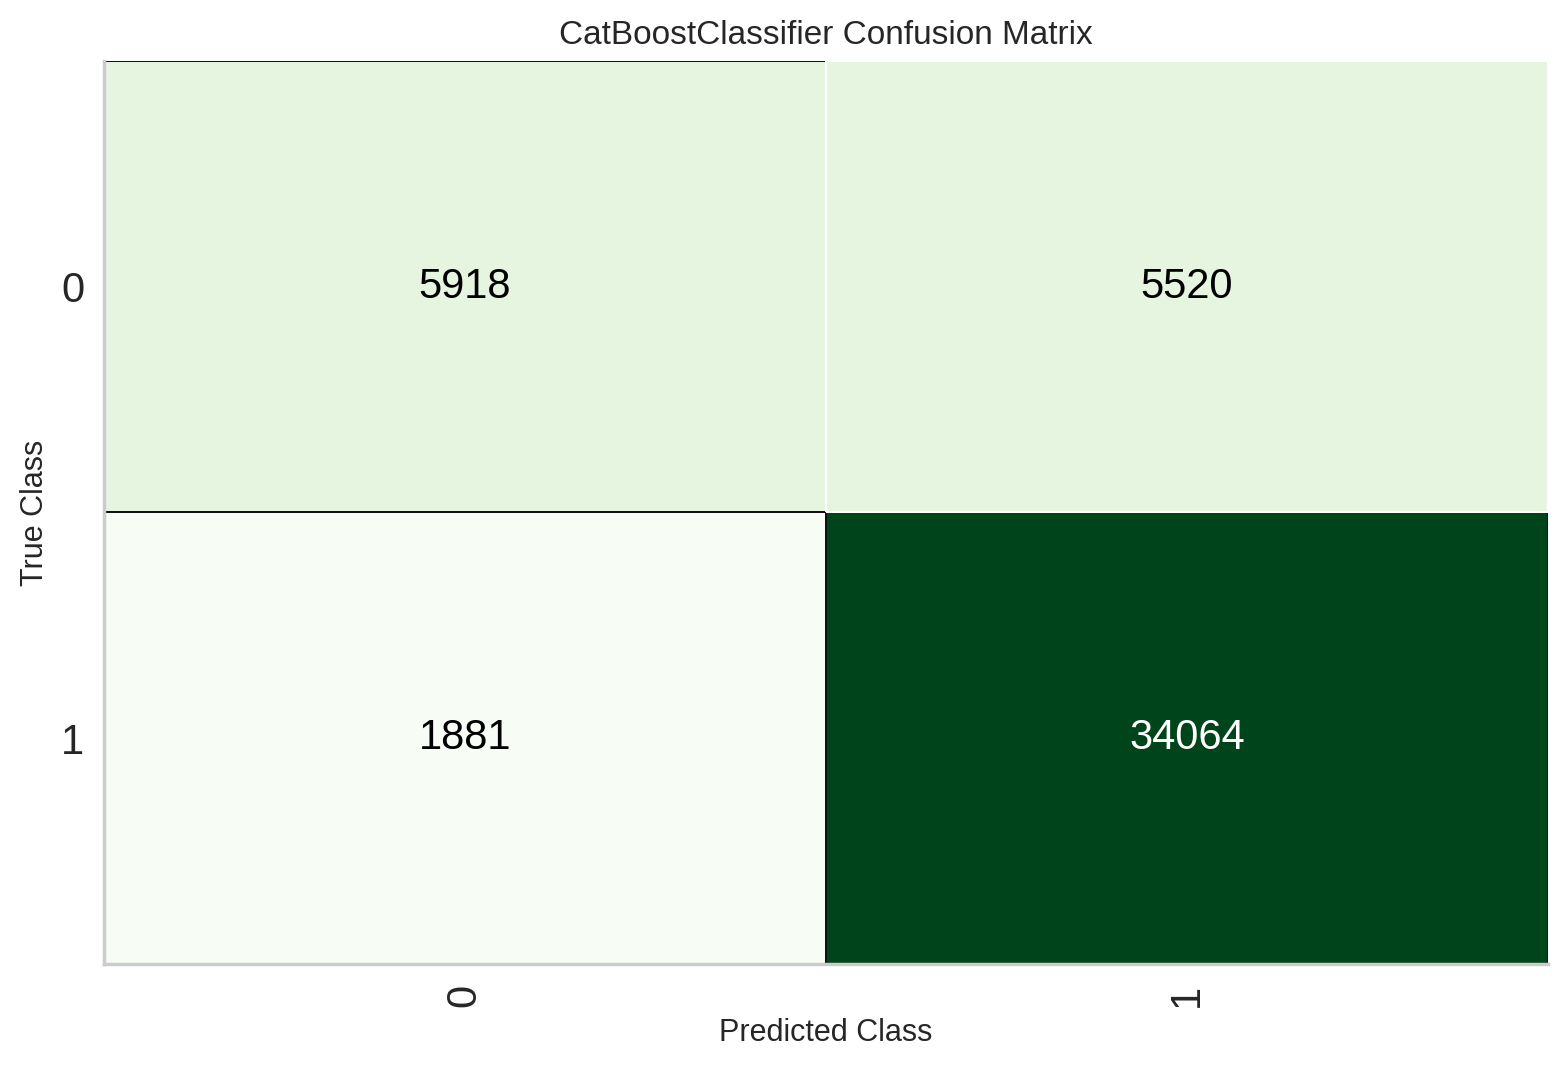

In [46]:
plot_model(catboost, plot = 'confusion_matrix')

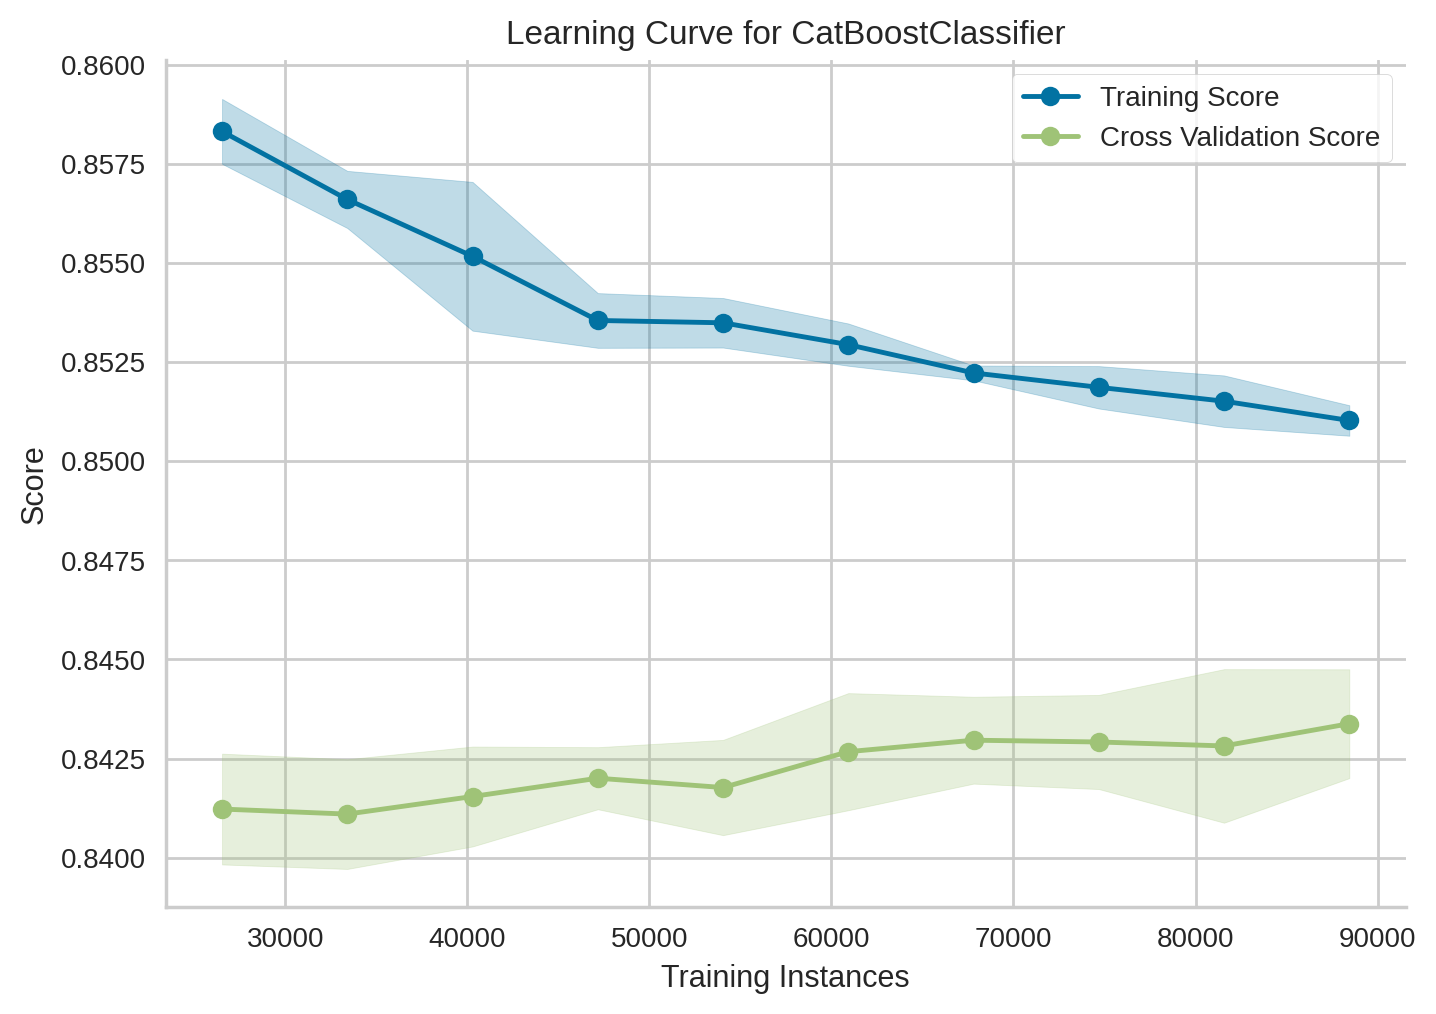

In [47]:
plot_model(catboost, plot = 'learning')

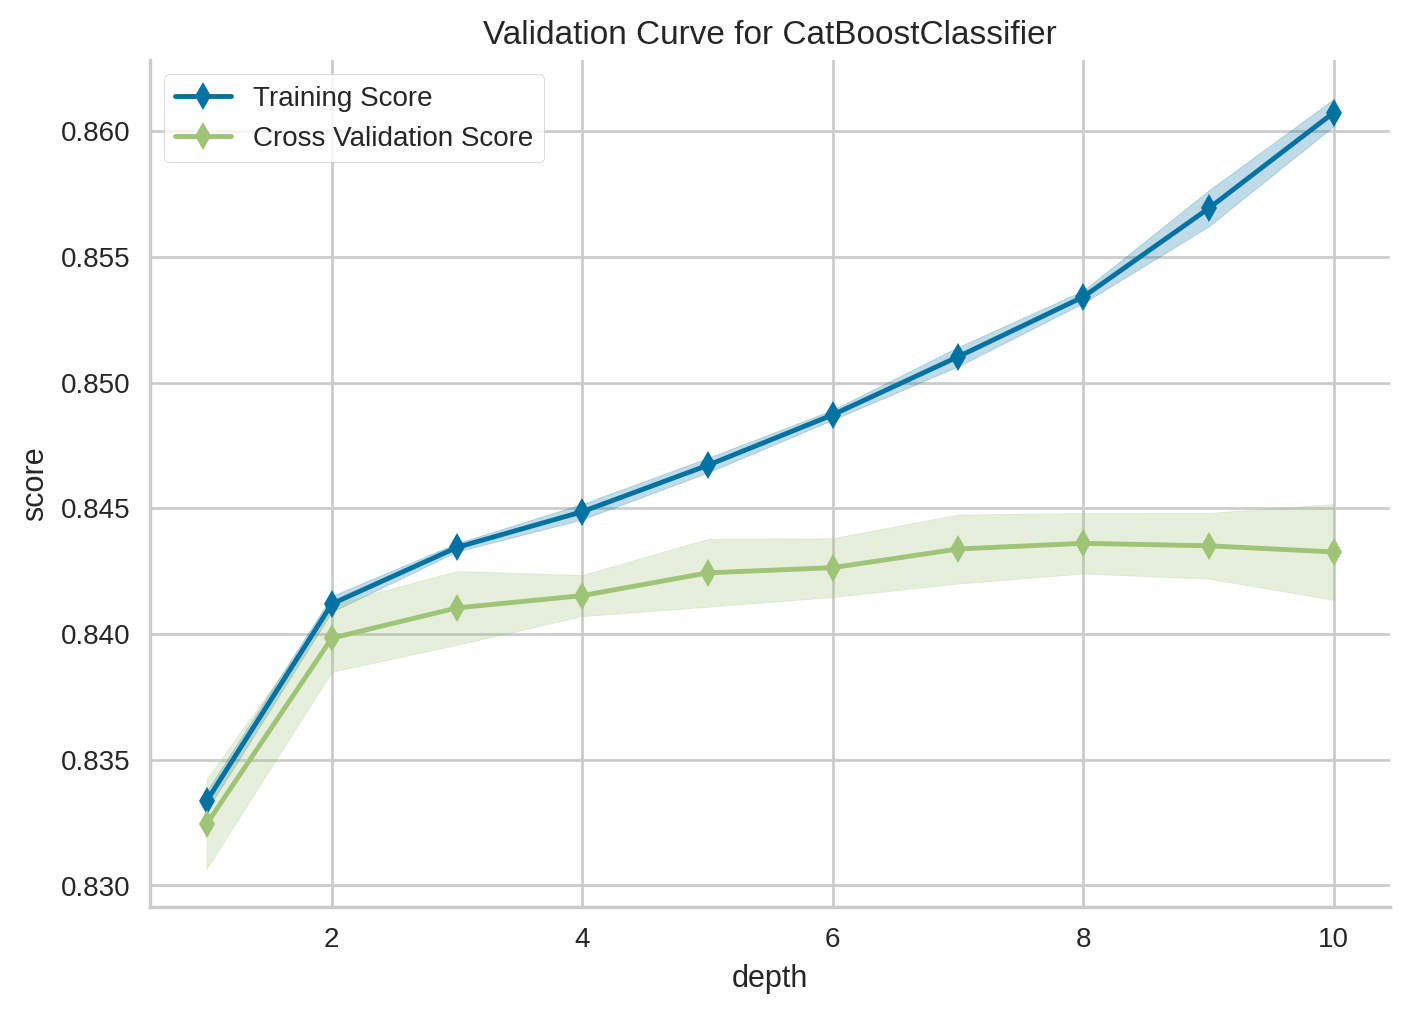

In [48]:
plot_model(catboost, plot = 'vc')

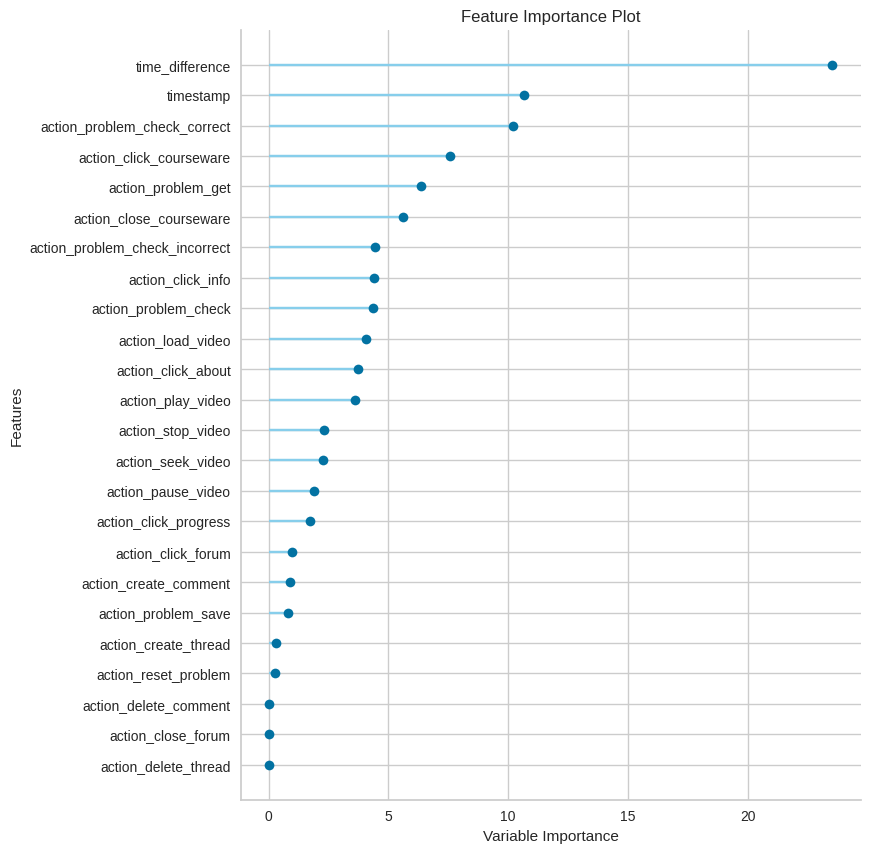

In [49]:
plot_model(catboost, plot = 'feature_all')

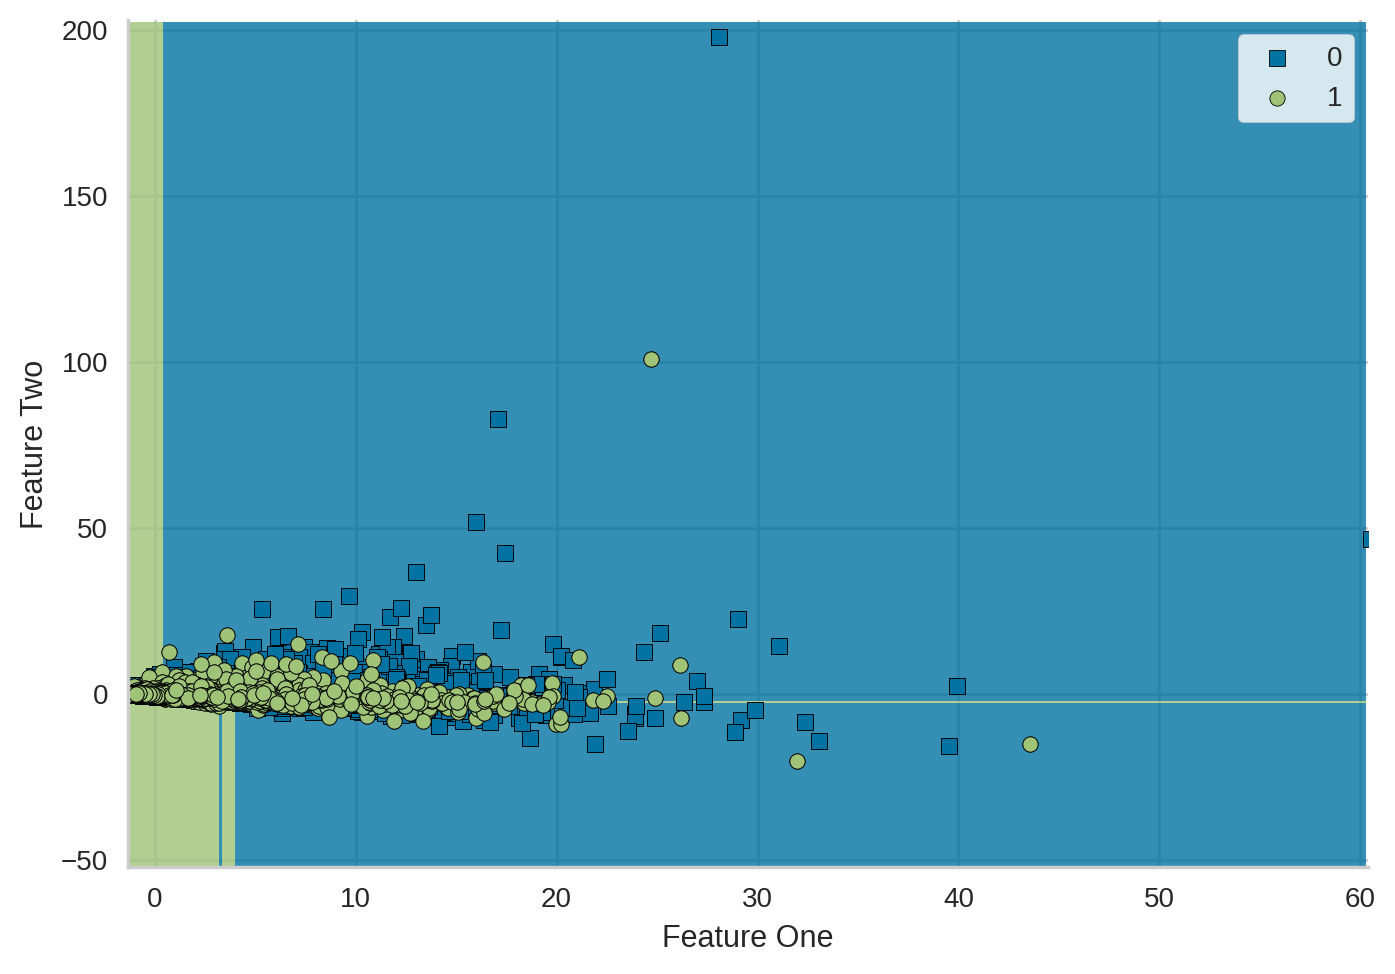

In [50]:
plot_model(catboost, plot = 'boundary')

In [51]:
predictions = predict_model(catboost, data = data_test)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8220,0.8321,0.9675,0.8271,0.8918,0.4078,0.4512


,action_click_about,action_click_courseware,action_click_forum,action_click_info,action_click_progress,action_close_courseware,action_close_forum,action_create_comment,action_create_thread,action_delete_comment,...,action_problem_get,action_problem_save,action_reset_problem,action_seek_video,action_stop_video,timestamp,time_difference,truth,prediction_label,prediction_score
0,6,6,0,2,0,3,0,0,0,0,...,0,0,0,7,0,42081403537,245099.0,1,1,0.8943
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,10254172468,13577145.0,1,1,0.9190
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1443116557,-21771892.0,1,1,0.9384
3,2,23,0,6,0,11,0,0,0,0,...,3,0,0,0,2,126816691568,15543095.0,1,1,0.7719
4,1,3,0,1,0,2,0,0,0,0,...,0,0,0,0,0,10102361096,-15464877.0,1,1,0.9361
